In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2
from scipy import signal
from sympy import sin, cos, pi
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.integrate import quad
from scipy.integrate import solve_ivp

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
np.set_printoptions(threshold=np.inf)

In [3]:
df1 = pd.read_csv("Demo/xd1.txt")
df1.rename(columns = {'-34.96598482131958':'señal2'}, inplace = True)
df2 = pd.read_csv("Demo/xd2.txt")
df2.rename(columns = {'-32.90852665901184':'señal2'}, inplace = True)
df3 = pd.read_csv("Demo/xd3.txt")
df3.rename(columns = {'-33.012510538101196':'señal2'}, inplace = True)
df4 = pd.read_csv("Demo/xd4.txt")
df4.rename(columns = {'-36.832319498062134':'señal2'}, inplace = True)
df5 = pd.read_csv("Demo/xd5.txt")
df5.rename(columns = {'-35.43909430503845':'señal2'}, inplace = True)
df6 = pd.read_csv("Demo/xd6.txt")
df6.rename(columns = {'-34.55896496772766':'señal2'}, inplace = True)
df7 = pd.read_csv("Demo/xd7.txt")
df7.rename(columns = {'-34.55225944519043':'señal2'}, inplace = True)
df8 = pd.read_csv("Demo/xd8.txt")
df8.rename(columns = {'-32.67963767051697':'señal2'}, inplace = True)

evento318_a1 = pd.read_csv("318/318_1.txt")
evento318_a2 = pd.read_csv("318/318_2.txt")
evento318_a3 = pd.read_csv("318/318_3.txt")

evento480_a1 = pd.read_csv("480/480_1.txt")
evento480_a2 = pd.read_csv("480/480_2.txt")
evento480_a3 = pd.read_csv("480/480_3.txt")
evento480_a4 = pd.read_csv("480/480_4.txt")
evento480_a5 = pd.read_csv("480/480_5.txt")

evento694_a1 = pd.read_csv("694/694_1.txt")
evento694_a2 = pd.read_csv("694/694_2.txt")
evento694_a3 = pd.read_csv("694/694_3.txt")
evento694_a4 = pd.read_csv("694/694_4.txt")
evento694_a5 = pd.read_csv("694/694_5.txt")

evento820_a1 = pd.read_csv("820/820_1.txt")
evento820_a2 = pd.read_csv("820/820_2.txt")
evento820_a3 = pd.read_csv("820/820_3.txt")
evento820_a4 = pd.read_csv("820/820_4.txt")
evento820_a5 = pd.read_csv("820/820_5.txt")
evento820_a6 = pd.read_csv("820/820_6.txt")
evento820_a7 = pd.read_csv("820/820_7.txt")
evento820_a8 = pd.read_csv("820/820_8.txt")

evento908_a1 = pd.read_csv("908/908_1.txt")
evento908_a2 = pd.read_csv("908/908_2.txt")
evento908_a3 = pd.read_csv("908/908_3.txt")
evento908_a4 = pd.read_csv("908/908_4.txt")
evento908_a5 = pd.read_csv("908/908_5.txt")
evento908_a6 = pd.read_csv("908/908_6.txt")
evento908_a7 = pd.read_csv("908/908_7.txt")
evento908_a8 = pd.read_csv("908/908_8.txt")

In [4]:
evento318_a1_x = evento318_a1[1:1129]
evento318_a2_x = evento318_a2[5:1028]
evento318_a3_x = evento318_a3[19:901]

In [5]:
evento480_a1_x = evento480_a1[7:544] #481.320620
evento480_a2_x = evento480_a2[3:423] #481.125214
evento480_a3_x = evento480_a3[53:680]
evento480_a4_x = evento480_a4[2:404]
evento480_a5_x = evento480_a5[44:727]

In [6]:
evento694_a1_x = evento694_a1[7:1633] #690.77 #693.999358
evento694_a2_x = evento694_a2[43:627]
evento694_a3_x = evento694_a3[69:1762]
evento694_a4_x = evento694_a4[0:1709]
evento694_a5_x = evento694_a5[3:989]

In [7]:
evento820_a1_x = evento820_a1[14:813] #818 - 820.873120 
evento820_a2_x = evento820_a2[73:1235] # Datos caca
evento820_a3_x = evento820_a3[19:1000]
evento820_a4_x = evento820_a4[0:471]
evento820_a5_x = evento820_a5[17:519]
evento820_a6_x = evento820_a6[:] #No se va a usar porque los datos son una mierda
evento820_a7_x = evento820_a7[3:609]
evento820_a8_x = evento820_a8[30:939]

In [8]:
evento908_a1_x = evento908_a1[833:1440] # 907.667227 - 908.889935
evento908_a2_x = evento908_a2[946:1415]
evento908_a3_x = evento908_a3[777:1227]
evento908_a4_x = evento908_a4[:] # Basura, bye
evento908_a5_x = evento908_a5[992:1771]
evento908_a6_x = evento908_a6[638:1195]
evento908_a7_x = evento908_a7[646:931] # Datos de mierda, de nuevo [tmb va hasta 908.38] los datos de signal son dif
evento908_a8_x = evento908_a8[912:1469]

### Gráficas rawdata

In [9]:
def plotseñal(evento):
    
    if evento == "evento318":
        
        a1 = evento318_a1_x
        a2 = evento318_a2_x
        a3 = evento318_a3_x
        
        plt.figure(figsize=(15,10))
        plt.scatter(a1.index, a1["Signal"], color='royalblue', label='R9')
        plt.scatter(a2.index, a2["Signal"], color='darkorange', label='R9')
        plt.scatter(a3.index, a3["Signal"], color='green', label='R9')

        plt.title("Evento")
        plt.xlabel("Time")
        plt.ylabel("Signal")

        plt.grid()
        plt.legend()
        plt.show()
    
    elif evento == "evento480":
        
        a1 = evento480_a1_x
        a2 = evento480_a2_x
        a3 = evento480_a3_x
        a4 = evento480_a4_x
        a5 = evento480_a5_x

        
        plt.figure(figsize=(15,10))
        plt.scatter(a1.index, a1["Signal"], color='royalblue', label='R9')
        plt.scatter(a2.index, a2["Signal"], color='darkorange', label='R9')
        plt.scatter(a3.index, a3["Signal"], color='green', label='R9')
        plt.scatter(a4.index, a4["Signal"], color='red', label='R9')
        plt.scatter(a5.index, a5["Signal"], color='mediumpurple', label='R9')

        plt.title("Evento")
        plt.xlabel("Time")
        plt.ylabel("Signal")

        plt.grid()
        plt.legend()
        plt.show()
        
    elif evento == "evento694":
        
        a1 = evento694_a1_x
        a2 = evento694_a2_x
        a3 = evento694_a3_x
        a4 = evento694_a4_x
        a5 = evento694_a5_x
        
        plt.figure(figsize=(15,10))
        plt.scatter(a1.index, a1["Signal"], color='royalblue', label='R9')
        plt.scatter(a2.index, a2["Signal"], color='darkorange', label='R9')
        plt.scatter(a3.index, a3["Signal"], color='green', label='R9')
        plt.scatter(a4.index, a4["Signal"], color='red', label='R9')
        plt.scatter(a5.index, a5["Signal"], color='mediumpurple', label='R9')

        plt.title("Evento")
        plt.xlabel("Time")
        plt.ylabel("Signal")

        plt.grid()
        plt.legend()
        plt.show()
        
    elif evento == "evento820":
        
        a1 = evento820_a1_x
        a2 = evento820_a2_x
        a3 = evento820_a3_x
        a4 = evento820_a4_x
        a5 = evento820_a5_x
        a7 = evento820_a7_x
        a8 = evento820_a8_x
        
        plt.figure(figsize=(15,10))
        plt.scatter(a1.index, a1["Signal"], color='royalblue', label='R9')
        #plt.scatter(a2.index, a2["Signal"], color='darkorange', label='R9')
        plt.scatter(a3.index, a3["Signal"], color='green', label='R9')
        plt.scatter(a4.index, a4["Signal"], color='red', label='R9')
        plt.scatter(a5.index, a5["Signal"], color='mediumpurple', label='R9')
        plt.scatter(a7.index, a7["Signal"], color='pink', label='R9')
        plt.scatter(a8.index, a8["Signal"], color='slategray', label='R9')

        plt.title("Evento")
        plt.xlabel("Time")
        plt.ylabel("Signal")

        plt.grid()
        plt.legend()
        plt.show()
        
    elif evento == "evento908":
        
        a1 = evento908_a1_x
        a2 = evento908_a2_x
        a3 = evento908_a3_x
        a5 = evento908_a5_x
        a6 = evento908_a6_x
        a7 = evento908_a7_x
        a8 = evento908_a8_x
        
        plt.figure(figsize=(15,10))
        plt.scatter(a1.index, a1["Signal"], color='royalblue', label='R9')
        plt.scatter(a2.index, a2["Signal"], color='darkorange', label='R9')
        plt.scatter(a3.index, a3["Signal"], color='green', label='R9')
        plt.scatter(a5.index, a5["Signal"], color='mediumpurple', label='R9')
        plt.scatter(a6.index, a6["Signal"], color='saddlebrown', label='R9')
        #plt.scatter(a7.index, a7["Signal"], color='pink', label='R9')
        plt.scatter(a8.index, a8["Signal"], color='slategray', label='R9')

        plt.title("Evento")
        plt.xlabel("Time")
        plt.ylabel("Signal")

        plt.grid()
        plt.legend()
        plt.show()
        
    else:
        print("???")

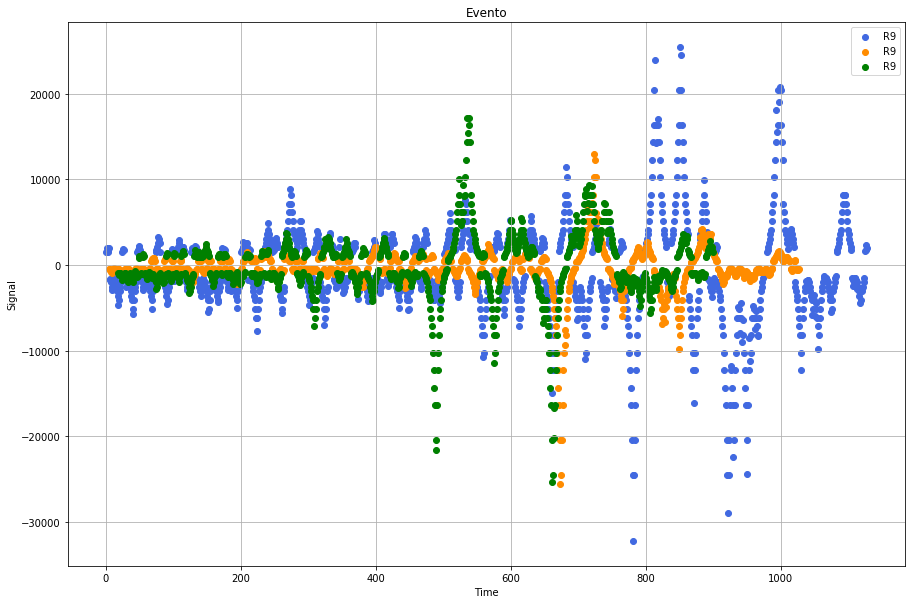

In [10]:
# Para plotear 
plotseñal("evento318")

### Remuestreos

In [11]:
evento318_a1_x.set_index('Time',inplace =True)
Time318_a1_x_resampled = np.linspace(evento318_a1_x.index[0], evento318_a1_x.index[-1], 1200)
#evento318_a1_xr = evento318_a1_x.reindex(evento318_a1_x.index.union(Time318_a1_x_resampled)).interpolate('spline',  order=3).loc[Time318_a1_x_resampled]
evento318_a1_xr = evento318_a1_x.reindex(evento318_a1_x.index.union(Time318_a1_x_resampled)).interpolate('linear').loc[Time318_a1_x_resampled]

evento318_a2_x.set_index('Time',inplace =True)
Time318_a2_x_resampled = np.linspace(evento318_a2_x.index[0], evento318_a2_x.index[-1], 1200)
#evento318_a2_xr = evento318_a2_x.reindex(evento318_a2_x.index.union(Time318_a2_x_resampled)).interpolate('spline',  order=3).loc[Time318_a2_x_resampled]
evento318_a2_xr = evento318_a2_x.reindex(evento318_a2_x.index.union(Time318_a2_x_resampled)).interpolate('linear').loc[Time318_a2_x_resampled]

evento318_a3_x.set_index('Time',inplace =True)
Time318_a3_x_resampled = np.linspace(evento318_a3_x.index[0], evento318_a3_x.index[-1], 1200)
#evento318_a3_xr = evento318_a3_x.reindex(evento318_a3_x.index.union(Time318_a3_x_resampled)).interpolate('spline',  order=3).loc[Time318_a3_x_resampled]
evento318_a3_xr = evento318_a3_x.reindex(evento318_a3_x.index.union(Time318_a3_x_resampled)).interpolate('linear').loc[Time318_a3_x_resampled]

####################################################################################################################

evento480_a1_x.set_index('Time',inplace =True)
Time480_a1_x_resampled = np.linspace(evento480_a1_x.index[0], evento480_a1_x.index[-1], 690)
#evento480_a1_xr = evento480_a1_x.reindex(evento480_a1_x.index.union(Time480_a1_x_resampled)).interpolate('spline',  order=3).loc[Time480_a1_x_resampled]
evento480_a1_xr = evento480_a1_x.reindex(evento480_a1_x.index.union(Time480_a1_x_resampled)).interpolate('linear').loc[Time480_a1_x_resampled]

evento480_a2_x.set_index('Time',inplace =True)
Time480_a2_x_resampled = np.linspace(evento480_a2_x.index[0], evento480_a2_x.index[-1], 690)
#evento480_a2_xr = evento480_a2_x.reindex(evento480_a2_x.index.union(Time480_a2_x_resampled)).interpolate('spline',  order=3).loc[Time480_a2_x_resampled]
evento480_a2_xr = evento480_a2_x.reindex(evento480_a2_x.index.union(Time480_a2_x_resampled)).interpolate('linear').loc[Time480_a2_x_resampled]

evento480_a3_x.set_index('Time',inplace =True)
Time480_a3_x_resampled = np.linspace(evento480_a3_x.index[0], evento480_a3_x.index[-1], 690)
#evento480_a3_xr = evento480_a3_x.reindex(evento480_a3_x.index.union(Time480_a3_x_resampled)).interpolate('spline',  order=3).loc[Time480_a3_x_resampled]
evento480_a3_xr = evento480_a3_x.reindex(evento480_a3_x.index.union(Time480_a3_x_resampled)).interpolate('linear').loc[Time480_a3_x_resampled]

evento480_a4_x.set_index('Time',inplace =True)
Time480_a4_x_resampled = np.linspace(evento480_a4_x.index[0], evento480_a4_x.index[-1], 690)
#evento480_a4_xr = evento480_a4_x.reindex(evento480_a4_x.index.union(Time480_a4_x_resampled)).interpolate('spline',  order=3).loc[Time480_a4_x_resampled]
evento480_a4_xr = evento480_a4_x.reindex(evento480_a4_x.index.union(Time480_a4_x_resampled)).interpolate('linear').loc[Time480_a4_x_resampled]

evento480_a5_x.set_index('Time',inplace =True)
Time480_a5_x_resampled = np.linspace(evento480_a5_x.index[0], evento480_a5_x.index[-1], 690)
#evento480_a5_xr = evento480_a5_x.reindex(evento480_a5_x.index.union(Time480_a5_x_resampled)).interpolate('spline',  order=3).loc[Time480_a5_x_resampled]
evento480_a5_xr = evento480_a5_x.reindex(evento480_a5_x.index.union(Time480_a5_x_resampled)).interpolate('linear').loc[Time480_a5_x_resampled]

####################################################################################################################

evento694_a1_x.set_index('Time',inplace =True)
Time694_a1_x_resampled = np.linspace(evento694_a1_x.index[0], evento694_a1_x.index[-1], 1600)
#evento694_a1_xr = evento694_a1_x.reindex(evento694_a1_x.index.union(Time694_a1_x_resampled)).interpolate('spline',  order=3).loc[Time694_a1_x_resampled]
evento694_a1_xr = evento694_a1_x.reindex(evento694_a1_x.index.union(Time694_a1_x_resampled)).interpolate('linear').loc[Time694_a1_x_resampled]

evento694_a2_x.set_index('Time',inplace =True)
Time694_a2_x_resampled = np.linspace(evento694_a2_x.index[0], evento694_a2_x.index[-1], 1600)
#evento694_a2_xr = evento694_a2_x.reindex(evento694_a2_x.index.union(Time694_a2_x_resampled)).interpolate('spline',  order=3).loc[Time694_a2_x_resampled]
evento694_a2_xr = evento694_a2_x.reindex(evento694_a2_x.index.union(Time694_a2_x_resampled)).interpolate('linear').loc[Time694_a2_x_resampled]

evento694_a3_x.set_index('Time',inplace =True)
Time694_a3_x_resampled = np.linspace(evento694_a3_x.index[0], evento694_a3_x.index[-1], 1600)
#evento694_a3_xr = evento694_a3_x.reindex(evento694_a3_x.index.union(Time694_a3_x_resampled)).interpolate('spline',  order=3).loc[Time694_a3_x_resampled]
evento694_a3_xr = evento694_a3_x.reindex(evento694_a3_x.index.union(Time694_a3_x_resampled)).interpolate('linear').loc[Time694_a3_x_resampled]

evento694_a4_x.set_index('Time',inplace =True)
Time694_a4_x_resampled = np.linspace(evento694_a4_x.index[0], evento694_a4_x.index[-1], 1600)
#evento694_a4_xr = evento694_a4_x.reindex(evento694_a4_x.index.union(Time694_a4_x_resampled)).interpolate('spline',  order=3).loc[Time694_a4_x_resampled]
evento694_a4_xr = evento694_a4_x.reindex(evento694_a4_x.index.union(Time694_a4_x_resampled)).interpolate('linear').loc[Time694_a4_x_resampled]

evento694_a5_x.set_index('Time',inplace =True)
Time694_a5_x_resampled = np.linspace(evento694_a5_x.index[0], evento694_a5_x.index[-1], 1600)
#evento694_a5_xr = evento694_a5_x.reindex(evento694_a5_x.index.union(Time694_a5_x_resampled)).interpolate('spline',  order=3).loc[Time694_a5_x_resampled]
evento694_a5_xr = evento694_a5_x.reindex(evento694_a5_x.index.union(Time694_a5_x_resampled)).interpolate('linear').loc[Time694_a5_x_resampled]

####################################################################################################################

evento820_a1_x.set_index('Time',inplace =True)
Time820_a1_x_resampled = np.linspace(evento820_a1_x.index[0], evento820_a1_x.index[-1], 1100)
#evento820_a1_xr = evento820_a1_x.reindex(evento820_a1_x.index.union(Time820_a1_x_resampled)).interpolate('spline',  order=3).loc[Time820_a1_x_resampled]
evento820_a1_xr = evento820_a1_x.reindex(evento820_a1_x.index.union(Time820_a1_x_resampled)).interpolate('linear').loc[Time820_a1_x_resampled]

evento820_a3_x.set_index('Time',inplace =True)
Time820_a3_x_resampled = np.linspace(evento820_a3_x.index[0], evento820_a3_x.index[-1], 1100)
#evento820_a3_xr = evento820_a3_x.reindex(evento820_a3_x.index.union(Time820_a3_x_resampled)).interpolate('spline',  order=3).loc[Time820_a3_x_resampled]
evento820_a3_xr = evento820_a3_x.reindex(evento820_a3_x.index.union(Time820_a3_x_resampled)).interpolate('linear').loc[Time820_a3_x_resampled]

evento820_a4_x.set_index('Time',inplace =True)
Time820_a4_x_resampled = np.linspace(evento820_a4_x.index[0], evento820_a4_x.index[-1], 1100)
#evento820_a4_xr = evento820_a4_x.reindex(evento820_a4_x.index.union(Time820_a4_x_resampled)).interpolate('spline',  order=3).loc[Time820_a4_x_resampled]
evento820_a4_xr = evento820_a4_x.reindex(evento820_a4_x.index.union(Time820_a4_x_resampled)).interpolate('linear').loc[Time820_a4_x_resampled]

evento820_a5_x.set_index('Time',inplace =True)
Time820_a5_x_resampled = np.linspace(evento820_a5_x.index[0], evento820_a5_x.index[-1], 1100)
#evento820_a5_xr = evento820_a5_x.reindex(evento820_a5_x.index.union(Time820_a5_x_resampled)).interpolate('spline',  order=3).loc[Time820_a5_x_resampled]
evento820_a5_xr = evento820_a5_x.reindex(evento820_a5_x.index.union(Time820_a5_x_resampled)).interpolate('linear').loc[Time820_a5_x_resampled]

evento820_a7_x.set_index('Time',inplace =True)
Time820_a7_x_resampled = np.linspace(evento820_a7_x.index[0], evento820_a7_x.index[-1], 1100)
#evento820_a7_xr = evento820_a7_x.reindex(evento820_a7_x.index.union(Time820_a7_x_resampled)).interpolate('spline',  order=3).loc[Time820_a7_x_resampled]
evento820_a7_xr = evento820_a7_x.reindex(evento820_a7_x.index.union(Time820_a7_x_resampled)).interpolate('linear').loc[Time820_a7_x_resampled]

evento820_a8_x.set_index('Time',inplace =True)
Time820_a8_x_resampled = np.linspace(evento820_a8_x.index[0], evento820_a8_x.index[-1], 1100)
#evento820_a8_xr = evento820_a8_x.reindex(evento820_a8_x.index.union(Time820_a8_x_resampled)).interpolate('spline',  order=3).loc[Time820_a8_x_resampled]
evento820_a8_xr = evento820_a8_x.reindex(evento820_a8_x.index.union(Time820_a8_x_resampled)).interpolate('linear').loc[Time820_a8_x_resampled]

####################################################################################################################

evento908_a1_x.set_index('Time',inplace =True)
Time908_a1_x_resampled = np.linspace(evento908_a1_x.index[0], evento908_a1_x.index[-1], 600)
evento908_a1_xr = evento908_a1_x.reindex(evento908_a1_x.index.union(Time908_a1_x_resampled)).interpolate('linear').loc[Time908_a1_x_resampled]

evento908_a2_x.set_index('Time',inplace =True)
Time908_a2_x_resampled = np.linspace(evento908_a2_x.index[0], evento908_a2_x.index[-1], 600)
evento908_a2_xr = evento908_a2_x.reindex(evento908_a2_x.index.union(Time908_a2_x_resampled)).interpolate('linear').loc[Time908_a2_x_resampled]

evento908_a3_x.set_index('Time',inplace =True)
Time908_a3_x_resampled = np.linspace(evento908_a3_x.index[0], evento908_a3_x.index[-1], 600)
evento908_a3_xr = evento908_a3_x.reindex(evento908_a3_x.index.union(Time908_a3_x_resampled)).interpolate('linear').loc[Time908_a3_x_resampled]

evento908_a5_x.set_index('Time',inplace =True)
Time908_a5_x_resampled = np.linspace(evento908_a5_x.index[0], evento908_a5_x.index[-1], 600)
evento908_a5_xr = evento908_a5_x.reindex(evento908_a5_x.index.union(Time908_a5_x_resampled)).interpolate('linear').loc[Time908_a5_x_resampled]

evento908_a6_x.set_index('Time',inplace =True)
Time908_a6_x_resampled = np.linspace(evento908_a6_x.index[0], evento908_a6_x.index[-1], 600)
evento908_a6_xr = evento908_a6_x.reindex(evento908_a6_x.index.union(Time908_a6_x_resampled)).interpolate('linear').loc[Time908_a6_x_resampled]

evento908_a8_x.set_index('Time',inplace =True)
Time908_a8_x_resampled = np.linspace(evento908_a8_x.index[0], evento908_a8_x.index[-1], 600)
evento908_a8_xr = evento908_a8_x.reindex(evento908_a8_x.index.union(Time908_a8_x_resampled)).interpolate('linear').loc[Time908_a8_x_resampled]



In [12]:
evento318_a1_xr.fillna(method='bfill', inplace=True)
evento318_a2_xr.fillna(method='bfill', inplace=True)
evento318_a3_xr.fillna(method='bfill', inplace=True)

evento480_a1_xr.fillna(method='bfill', inplace=True)
evento480_a2_xr.fillna(method='bfill', inplace=True)
evento480_a3_xr.fillna(method='bfill', inplace=True)
evento480_a4_xr.fillna(method='bfill', inplace=True)
evento480_a5_xr.fillna(method='bfill', inplace=True)

evento694_a1_xr.fillna(method='bfill', inplace=True)
evento694_a2_xr.fillna(method='bfill', inplace=True)
evento694_a3_xr.fillna(method='bfill', inplace=True)
evento694_a4_xr.fillna(method='bfill', inplace=True)
evento694_a5_xr.fillna(method='bfill', inplace=True)

evento820_a1_xr.fillna(method='bfill', inplace=True)
evento820_a3_xr.fillna(method='bfill', inplace=True)
evento820_a4_xr.fillna(method='bfill', inplace=True)
evento820_a5_xr.fillna(method='bfill', inplace=True)
evento820_a7_xr.fillna(method='bfill', inplace=True)
evento820_a8_xr.fillna(method='bfill', inplace=True)

evento908_a1_xr.fillna(method='bfill', inplace=True)
evento908_a2_xr.fillna(method='bfill', inplace=True)
evento908_a3_xr.fillna(method='bfill', inplace=True)
evento908_a5_xr.fillna(method='bfill', inplace=True)
evento908_a6_xr.fillna(method='bfill', inplace=True)
evento908_a8_xr.fillna(method='bfill', inplace=True)

evento318_a1_xrn = evento318_a1_xr["Signal"].to_numpy()
evento318_a2_xrn = evento318_a2_xr["Signal"].to_numpy()
evento318_a3_xrn = evento318_a3_xr["Signal"].to_numpy()

evento480_a1_xrn = evento480_a1_xr["Signal"].to_numpy()
evento480_a2_xrn = evento480_a2_xr["Signal"].to_numpy()
evento480_a3_xrn = evento480_a3_xr["Signal"].to_numpy()
evento480_a4_xrn = evento480_a4_xr["Signal"].to_numpy()
evento480_a5_xrn = evento480_a5_xr["Signal"].to_numpy()

evento694_a1_xrn = evento694_a1_xr["Signal"].to_numpy()
evento694_a2_xrn = evento694_a2_xr["Signal"].to_numpy()
evento694_a3_xrn = evento694_a3_xr["Signal"].to_numpy()
evento694_a4_xrn = evento694_a4_xr["Signal"].to_numpy()
evento694_a5_xrn = evento694_a5_xr["Signal"].to_numpy()

evento820_a1_xrn = evento820_a1_xr["Signal"].to_numpy()
evento820_a3_xrn = evento820_a3_xr["Signal"].to_numpy()
evento820_a4_xrn = evento820_a4_xr["Signal"].to_numpy()
evento820_a5_xrn = evento820_a5_xr["Signal"].to_numpy()
evento820_a7_xrn = evento820_a7_xr["Signal"].to_numpy()
evento820_a8_xrn = evento820_a8_xr["Signal"].to_numpy()

evento908_a1_xrn = evento908_a1_xr["Signal"].to_numpy()
evento908_a2_xrn = evento908_a2_xr["Signal"].to_numpy()
evento908_a3_xrn = evento908_a3_xr["Signal"].to_numpy()
evento908_a5_xrn = evento908_a5_xr["Signal"].to_numpy()
evento908_a6_xrn = evento908_a6_xr["Signal"].to_numpy()
evento908_a8_xrn = evento908_a8_xr["Signal"].to_numpy()

### Plot de los resamples

In [13]:
def plotseñal_resample(evento):
    
    if evento == "evento318":
        
        a1 = evento318_a1_xr
        a2 = evento318_a2_xr
        a3 = evento318_a3_xr
        
        plt.figure(figsize=(15,10))
        plt.plot(a1.index, a1["Signal"], color='royalblue', label='R9')
        plt.plot(a2.index, a2["Signal"], color='darkorange', label='R9')
        plt.plot(a3.index, a3["Signal"], color='green', label='R9')

        plt.title("Evento")
        plt.xlabel("Time")
        plt.ylabel("Signal")

        plt.grid()
        plt.legend()
        plt.show()
    
    elif evento == "evento480":
        
        a1 = evento480_a1_xr
        a2 = evento480_a2_xr
        a3 = evento480_a3_xr
        a4 = evento480_a4_xr
        a5 = evento480_a5_xr

        
        plt.figure(figsize=(15,10))
        plt.plot(a1.index, a1["Signal"], color='royalblue', label='R9')
        plt.plot(a2.index, a2["Signal"], color='darkorange', label='R9')
        plt.plot(a3.index, a3["Signal"], color='green', label='R9')
        plt.plot(a4.index, a4["Signal"], color='red', label='R9')
        plt.plot(a5.index, a5["Signal"], color='mediumpurple', label='R9')

        plt.title("Evento")
        plt.xlabel("Time")
        plt.ylabel("Signal")

        plt.grid()
        plt.legend()
        plt.show()
        
    elif evento == "evento694":
        
        a1 = evento694_a1_xr
        a2 = evento694_a2_xr
        a3 = evento694_a3_xr
        a4 = evento694_a4_xr
        a5 = evento694_a5_xr
        
        plt.figure(figsize=(15,10))
        plt.plot(a1.index, a1["Signal"], color='royalblue', label='R9')
        plt.plot(a2.index, a2["Signal"], color='darkorange', label='R9')
        plt.plot(a3.index, a3["Signal"], color='green', label='R9')
        plt.plot(a4.index, a4["Signal"], color='red', label='R9')
        plt.plot(a5.index, a5["Signal"], color='mediumpurple', label='R9')

        plt.title("Evento")
        plt.xlabel("Time")
        plt.ylabel("Signal")

        plt.grid()
        plt.legend()
        plt.show()
        
    elif evento == "evento820":
        
        a1 = evento820_a1_xr
        a3 = evento820_a3_xr
        a4 = evento820_a4_xr
        a5 = evento820_a5_xr
        a7 = evento820_a7_xr
        a8 = evento820_a8_xr
        
        plt.figure(figsize=(15,10))
        plt.plot(a1.index, a1["Signal"], color='royalblue', label='R9')
        plt.plot(a3.index, a3["Signal"], color='green', label='R9')
        plt.plot(a4.index, a4["Signal"], color='red', label='R9')
        plt.plot(a5.index, a5["Signal"], color='mediumpurple', label='R9')
        plt.plot(a7.index, a7["Signal"], color='pink', label='R9')
        plt.plot(a8.index, a8["Signal"], color='slategray', label='R9')

        plt.title("Evento")
        plt.xlabel("Time")
        plt.ylabel("Signal")

        plt.grid()
        plt.legend()
        plt.show()
        
    elif evento == "evento908":
        
        a1 = evento908_a1_xr
        a2 = evento908_a2_xr
        a3 = evento908_a3_xr
        a5 = evento908_a5_xr
        a6 = evento908_a6_xr
        a8 = evento908_a8_xr
        
        plt.figure(figsize=(15,10))
        plt.plot(a1.index, a1["Signal"], color='royalblue', label='R9')
        plt.plot(a2.index, a2["Signal"], color='darkorange', label='R9')
        plt.plot(a3.index, a3["Signal"], color='green', label='R9')
        plt.plot(a5.index, a5["Signal"], color='mediumpurple', label='R9')
        plt.plot(a6.index, a6["Signal"], color='saddlebrown', label='R9')
        plt.plot(a8.index, a8["Signal"], color='slategray', label='R9')

        plt.title("Evento")
        plt.xlabel("Time")
        plt.ylabel("Signal")

        plt.grid()
        plt.legend()
        plt.show()
        
    else:
        print("???")

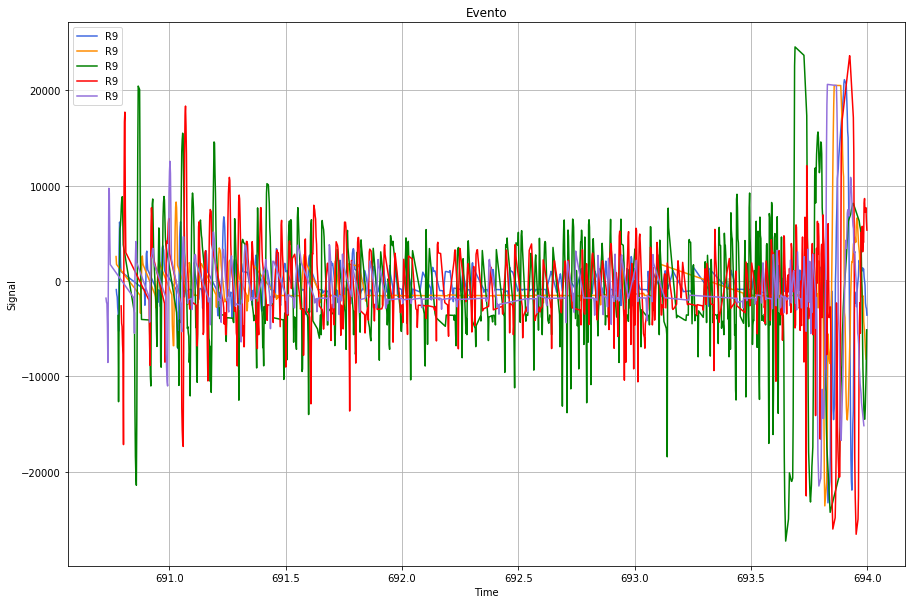

In [49]:
plotseñal_resample("evento694")

 FFT

In [15]:
evento318_a1_xr_FFT = fft(evento318_a1_xrn)
evento318_a2_xr_FFT = fft(evento318_a2_xrn)
evento318_a3_xr_FFT = fft(evento318_a3_xrn)
freq318_1 = fftfreq(len(evento318_a1_xr.index), np.diff(evento318_a1_xr.index)[0])
freq318_2 = fftfreq(len(evento318_a2_xr.index), np.diff(evento318_a2_xr.index)[0])
freq318_3 = fftfreq(len(evento318_a3_xr.index), np.diff(evento318_a3_xr.index)[0])

evento480_a1_xr_FFT = fft(evento480_a1_xrn)
evento480_a2_xr_FFT = fft(evento480_a2_xrn)
evento480_a3_xr_FFT = fft(evento480_a3_xrn)
evento480_a4_xr_FFT = fft(evento480_a4_xrn)
evento480_a5_xr_FFT = fft(evento480_a5_xrn)
freq480_1 = fftfreq(len(evento480_a1_xr.index), np.diff(evento480_a1_xr.index)[0])
freq480_2 = fftfreq(len(evento480_a2_xr.index), np.diff(evento480_a2_xr.index)[0])
freq480_3 = fftfreq(len(evento480_a3_xr.index), np.diff(evento480_a3_xr.index)[0])
freq480_4 = fftfreq(len(evento480_a4_xr.index), np.diff(evento480_a4_xr.index)[0])
freq480_5 = fftfreq(len(evento480_a5_xr.index), np.diff(evento480_a5_xr.index)[0])

evento694_a1_xr_FFT = fft(evento694_a1_xrn)
evento694_a2_xr_FFT = fft(evento694_a2_xrn)
evento694_a3_xr_FFT = fft(evento694_a3_xrn)
evento694_a4_xr_FFT = fft(evento694_a4_xrn)
evento694_a5_xr_FFT = fft(evento694_a5_xrn)
freq694_1 = fftfreq(len(evento694_a1_xr.index), np.diff(evento694_a1_xr.index)[0])
freq694_2 = fftfreq(len(evento694_a2_xr.index), np.diff(evento694_a2_xr.index)[0])
freq694_3 = fftfreq(len(evento694_a3_xr.index), np.diff(evento694_a3_xr.index)[0])
freq694_4 = fftfreq(len(evento694_a4_xr.index), np.diff(evento694_a4_xr.index)[0])
freq694_5 = fftfreq(len(evento694_a5_xr.index), np.diff(evento694_a5_xr.index)[0])

evento820_a1_xr_FFT = fft(evento820_a1_xrn)
evento820_a3_xr_FFT = fft(evento820_a3_xrn)
evento820_a4_xr_FFT = fft(evento820_a4_xrn)
evento820_a5_xr_FFT = fft(evento820_a5_xrn)
evento820_a7_xr_FFT = fft(evento820_a7_xrn)
evento820_a8_xr_FFT = fft(evento820_a8_xrn)
freq820_1 = fftfreq(len(evento820_a1_xr.index), np.diff(evento820_a1_xr.index)[0])
freq820_3 = fftfreq(len(evento820_a3_xr.index), np.diff(evento820_a3_xr.index)[0])
freq820_4 = fftfreq(len(evento820_a4_xr.index), np.diff(evento820_a4_xr.index)[0])
freq820_5 = fftfreq(len(evento820_a5_xr.index), np.diff(evento820_a5_xr.index)[0])
freq820_7 = fftfreq(len(evento820_a7_xr.index), np.diff(evento820_a7_xr.index)[0])
freq820_8 = fftfreq(len(evento820_a8_xr.index), np.diff(evento820_a8_xr.index)[0])

evento908_a1_xr_FFT = fft(evento908_a1_xrn)
evento908_a2_xr_FFT = fft(evento908_a2_xrn)
evento908_a3_xr_FFT = fft(evento908_a3_xrn)
evento908_a5_xr_FFT = fft(evento908_a5_xrn)
evento908_a6_xr_FFT = fft(evento908_a6_xrn)
evento908_a8_xr_FFT = fft(evento908_a8_xrn)
freq908_1 = fftfreq(len(evento908_a1_xr.index), np.diff(evento908_a1_xr.index)[0])
freq908_2 = fftfreq(len(evento908_a2_xr.index), np.diff(evento908_a2_xr.index)[0])
freq908_3 = fftfreq(len(evento908_a3_xr.index), np.diff(evento908_a3_xr.index)[0])
freq908_5 = fftfreq(len(evento908_a5_xr.index), np.diff(evento908_a5_xr.index)[0])
freq908_6 = fftfreq(len(evento908_a6_xr.index), np.diff(evento908_a6_xr.index)[0])
freq908_8 = fftfreq(len(evento908_a8_xr.index), np.diff(evento908_a8_xr.index)[0])


In [16]:
#evento318_a1_xr_FFT_ = np.abs(evento318_a1_xr_FFT[:len(evento318_a1_xr.index)//2])
#evento318_a2_xr_FFT_ = np.abs(evento318_a2_xr_FFT[:len(evento318_a2_xr.index)//2])
#evento318_a3_xr_FFT_ = np.abs(evento318_a3_xr_FFT[:len(evento318_a3_xr.index)//2])

## Plots - CLEANING THE NOISY SIGNAL - ESPECTROS DE POTENCIA

TAMBIÉN PROBAR CON FUNCIÓN AUTOCORRELACIÓN?

### 318

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


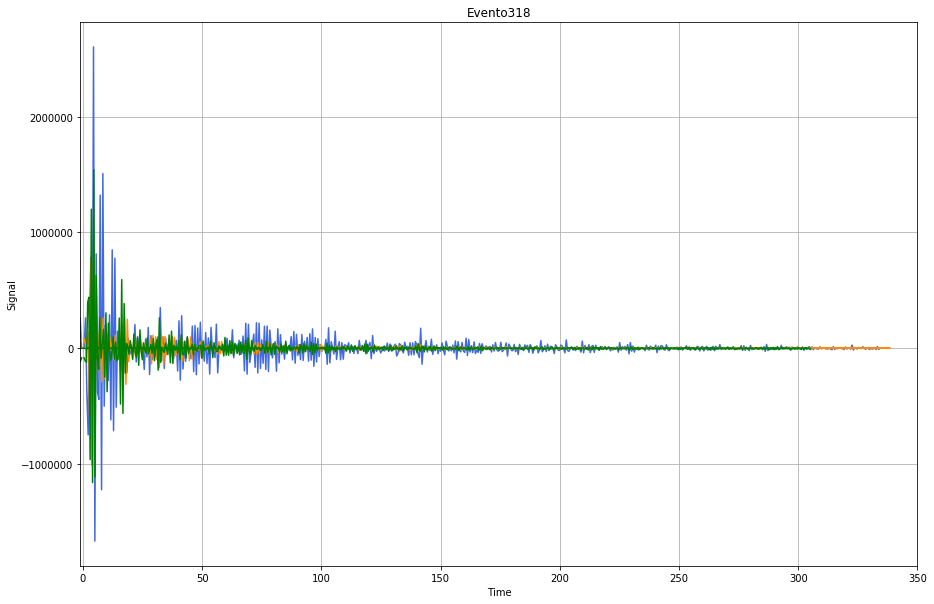

In [17]:
plt.figure(figsize=(15,10))

#plt.plot(freq318_1[:len(evento318_a1_xr.index)//2], evento318_a1_xr_FFT[:len(evento318_a1_xr.index)//2], color='royalblue', label='R9')
#plt.plot(freq318_2[:len(evento318_a2_xr.index)//2], evento318_a2_xr_FFT[:len(evento318_a2_xr.index)//2], color='darkorange', label='R9')
#plt.plot(freq318_3[:len(evento318_a3_xr.index)//2], evento318_a3_xr_FFT[:len(evento318_a3_xr.index)//2], color='green', label='R9')

plt.plot(freq318_1[1::], evento318_a1_xr_FFT[1::], color='royalblue', label='R9')
plt.plot(freq318_2[1::], evento318_a2_xr_FFT[1::], color='darkorange', label='R9')
plt.plot(freq318_3[1::], evento318_a3_xr_FFT[1::], color='green', label='R9')

plt.xlim(-1,350)
#plt.xticks(np.arange(0,10,0.5))

plt.title("Evento318")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.grid()
#plt.xlim(216.007405,218.152862)
#plt.xlim(216.007405,217.791571)


EN REALIDAD CREO QUE EL ESPECTRO DE POTENCIA ES |S|^2, ENTONCES NO ES NECESARIO EL "np.abs" en "np.abs(evento318_a1_xr_FFT)". SI ESTO ES ASÍ ENTONCES CAMBIARLOS TODOS POR |S|^2 (MAGNITUD^2 o FFT*CONJ(FFT))

LA GRÁFICA DE ARRIBA ES LA DE FREQ VS FFT, NO PSD |S|^2 (POWER SPECTRAL DENSITY). REVISAR Y CAMBIAR

In [18]:
C_318_a1 = np.sqrt(2*np.pi)*np.conjugate(evento318_a1_xr_FFT)*evento318_a1_xr_FFT
C_318_a1 = C_318_a1/np.sqrt(2*np.pi)
C_318_a1 = np.abs(C_318_a1)

C_318_a2 = np.sqrt(2*np.pi)*np.conjugate(evento318_a2_xr_FFT)*evento318_a2_xr_FFT
C_318_a2 = C_318_a2/np.sqrt(2*np.pi)
C_318_a2 = np.abs(C_318_a2)

C_318_a3 = np.sqrt(2*np.pi)*np.conjugate(evento318_a3_xr_FFT)*evento318_a3_xr_FFT
C_318_a3 = C_318_a3/np.sqrt(2*np.pi)
C_318_a3 = np.abs(C_318_a3)
#S3Limpia2 = S3Limpia.copy()

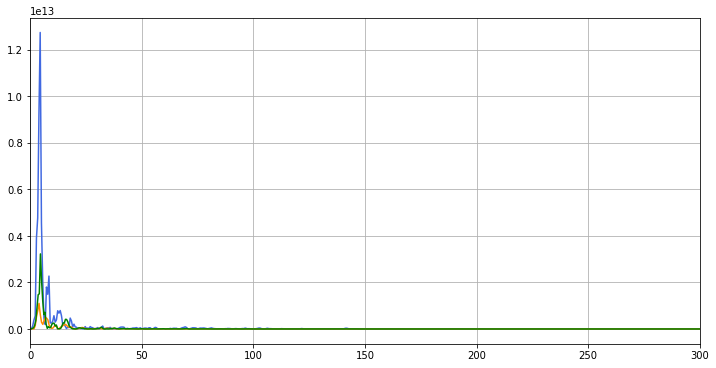

In [19]:
plt.figure(figsize=(12,6))
plt.plot(freq318_1[1:len(C_318_a1)//2],C_318_a1[1:len(C_318_a1)//2], color='royalblue')
plt.plot(freq318_2[1:len(C_318_a2)//2],C_318_a2[1:len(C_318_a2)//2], color='darkorange')
plt.plot(freq318_3[1:len(C_318_a3)//2],C_318_a3[1:len(C_318_a3)//2], color='green')

plt.xlim(0,300)

plt.grid()

In [20]:
indices318_a1 = C_318_a1 > 0.02*10**13
indices318_a2 = C_318_a2 > 0.02*10**13
indices318_a3 = C_318_a3 > 0.02*10**13

C_318_a1clean = C_318_a1 * indices318_a1
C_318_a2clean = C_318_a2 * indices318_a2
C_318_a3clean = C_318_a3 * indices318_a3

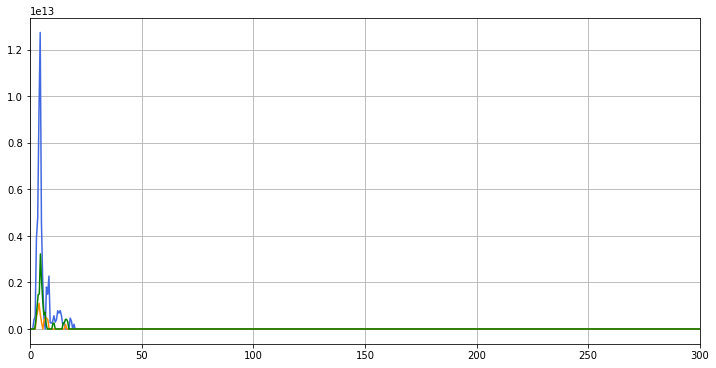

In [21]:
plt.figure(figsize=(12,6))
plt.plot(freq318_1[1:len(C_318_a1clean)//2],C_318_a1clean[1:len(C_318_a1clean)//2], color='royalblue')
plt.plot(freq318_2[1:len(C_318_a2clean)//2],C_318_a2clean[1:len(C_318_a2clean)//2], color='darkorange')
plt.plot(freq318_3[1:len(C_318_a3clean)//2],C_318_a3clean[1:len(C_318_a3clean)//2], color='green')

plt.xlim(0,300)

plt.grid()

### 480

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


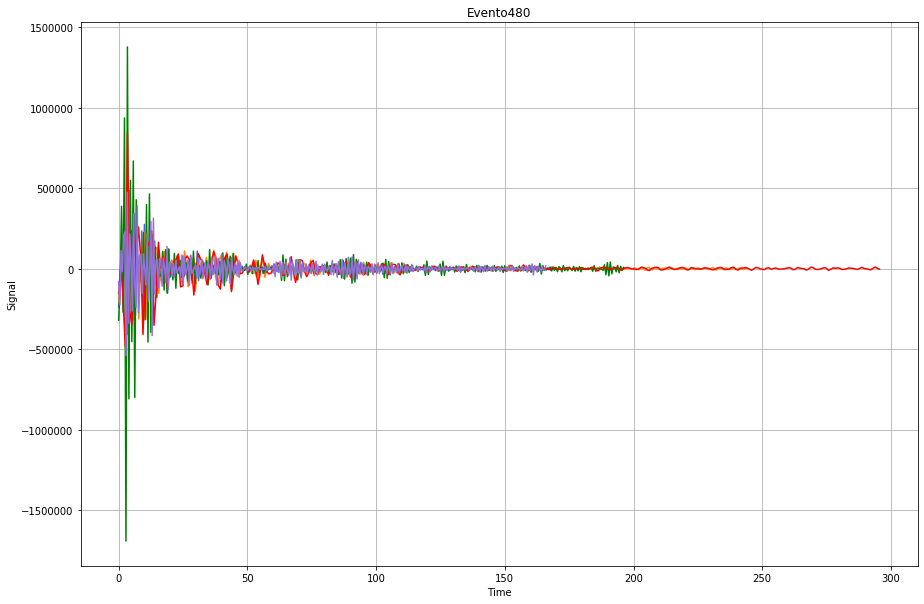

In [22]:
plt.figure(figsize=(15,10))

plt.plot(freq480_1[:len(evento480_a1_xr.index)//2], evento480_a1_xr_FFT[:len(evento480_a1_xr.index)//2], color='royalblue', label='R9')
plt.plot(freq480_2[:len(evento480_a2_xr.index)//2], evento480_a2_xr_FFT[:len(evento480_a2_xr.index)//2], color='darkorange', label='R9')
plt.plot(freq480_3[:len(evento480_a3_xr.index)//2], evento480_a3_xr_FFT[:len(evento480_a3_xr.index)//2], color='green', label='R9')
plt.plot(freq480_4[:len(evento480_a4_xr.index)//2], evento480_a4_xr_FFT[:len(evento480_a4_xr.index)//2], color='red', label='R9')
plt.plot(freq480_5[:len(evento480_a5_xr.index)//2], evento480_a5_xr_FFT[:len(evento480_a5_xr.index)//2], color='mediumpurple', label='R9')

plt.title("Evento480")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.grid()
#plt.xlim(216.007405,218.152862)
#plt.xlim(216.007405,217.791571)


In [23]:
C_480_a1 = np.sqrt(2*np.pi)*np.conjugate(evento480_a1_xr_FFT)*evento480_a1_xr_FFT
C_480_a1 = C_480_a1/np.sqrt(2*np.pi)
C_480_a1 = np.abs(C_480_a1)

C_480_a2 = np.sqrt(2*np.pi)*np.conjugate(evento480_a2_xr_FFT)*evento480_a2_xr_FFT
C_480_a2 = C_480_a2/np.sqrt(2*np.pi)
C_480_a2 = np.abs(C_480_a2)

C_480_a3 = np.sqrt(2*np.pi)*np.conjugate(evento480_a3_xr_FFT)*evento480_a3_xr_FFT
C_480_a3 = C_480_a3/np.sqrt(2*np.pi)
C_480_a3 = np.abs(C_480_a3)

C_480_a4 = np.sqrt(2*np.pi)*np.conjugate(evento480_a4_xr_FFT)*evento480_a4_xr_FFT
C_480_a4 = C_480_a4/np.sqrt(2*np.pi)
C_480_a4 = np.abs(C_480_a4)

C_480_a5 = np.sqrt(2*np.pi)*np.conjugate(evento480_a5_xr_FFT)*evento480_a5_xr_FFT
C_480_a5 = C_480_a5/np.sqrt(2*np.pi)
C_480_a5 = np.abs(C_480_a5)

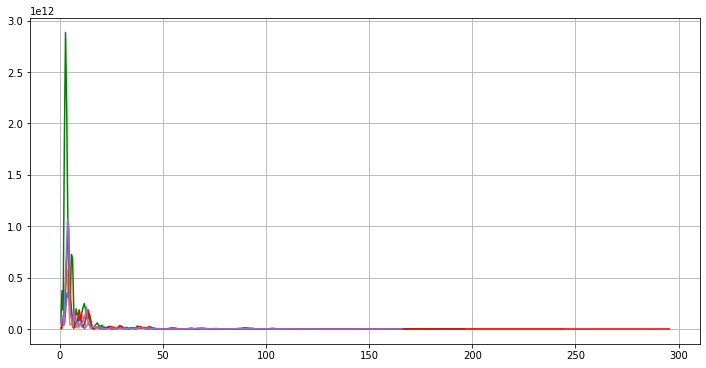

In [24]:
plt.figure(figsize=(12,6))
plt.plot(freq480_1[1:len(C_480_a1)//2],C_480_a1[1:len(C_480_a1)//2], color='royalblue')
plt.plot(freq480_2[1:len(C_480_a2)//2],C_480_a2[1:len(C_480_a2)//2], color='darkorange')
plt.plot(freq480_3[1:len(C_480_a3)//2],C_480_a3[1:len(C_480_a3)//2], color='green')
plt.plot(freq480_4[1:len(C_480_a3)//2],C_480_a4[1:len(C_480_a3)//2], color='red')
plt.plot(freq480_5[1:len(C_480_a3)//2],C_480_a5[1:len(C_480_a3)//2], color='mediumpurple')

#plt.xlim(0,300)

plt.grid()

In [25]:
indices480_a1 = C_480_a1 > 0.15*10**12
indices480_a2 = C_480_a2 > 0.15*10**12
indices480_a3 = C_480_a3 > 0.15*10**12
indices480_a4 = C_480_a4 > 0.15*10**12
indices480_a5 = C_480_a5 > 0.11*10**12

C_480_a1clean = C_480_a1 * indices480_a1
C_480_a2clean = C_480_a2 * indices480_a2
C_480_a3clean = C_480_a3 * indices480_a3
C_480_a4clean = C_480_a4 * indices480_a4
C_480_a5clean = C_480_a5 * indices480_a5

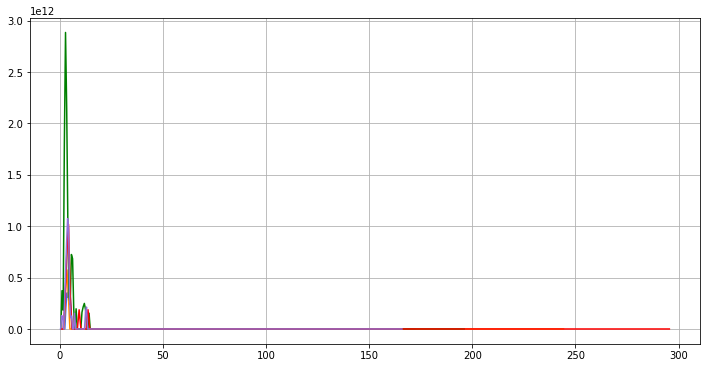

In [26]:
plt.figure(figsize=(12,6))
plt.plot(freq480_1[1:len(C_480_a1clean)//2],C_480_a1clean[1:len(C_480_a1clean)//2], color='royalblue')
plt.plot(freq480_2[1:len(C_480_a2clean)//2],C_480_a2clean[1:len(C_480_a2clean)//2], color='darkorange')
plt.plot(freq480_3[1:len(C_480_a3clean)//2],C_480_a3clean[1:len(C_480_a3clean)//2], color='green')
plt.plot(freq480_4[1:len(C_480_a4clean)//2],C_480_a4clean[1:len(C_480_a4clean)//2], color='red')
plt.plot(freq480_5[1:len(C_480_a5clean)//2],C_480_a5clean[1:len(C_480_a5clean)//2], color='mediumpurple')

#plt.xlim(0,300)

plt.grid()

### 694

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


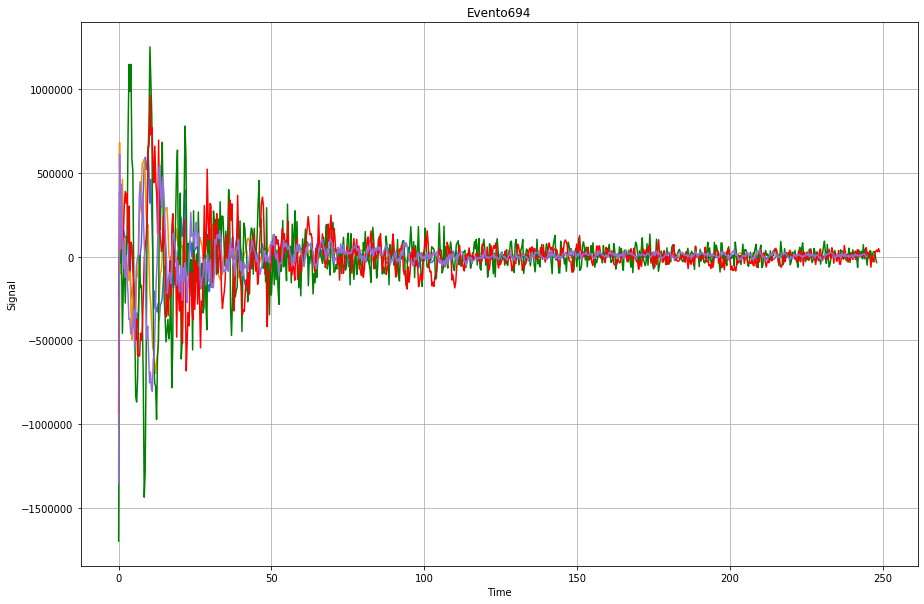

In [27]:
plt.figure(figsize=(15,10))

plt.plot(freq694_1[:len(evento694_a1_xr.index)//2], evento694_a1_xr_FFT[:len(evento694_a1_xr.index)//2], color='royalblue', label='R9')
plt.plot(freq694_2[:len(evento694_a2_xr.index)//2], evento694_a2_xr_FFT[:len(evento694_a2_xr.index)//2], color='darkorange', label='R9')
plt.plot(freq694_3[:len(evento694_a3_xr.index)//2], evento694_a3_xr_FFT[:len(evento694_a3_xr.index)//2], color='green', label='R9')
plt.plot(freq694_4[:len(evento694_a4_xr.index)//2], evento694_a4_xr_FFT[:len(evento694_a4_xr.index)//2], color='red', label='R9')
plt.plot(freq694_5[:len(evento694_a5_xr.index)//2], evento694_a5_xr_FFT[:len(evento694_a5_xr.index)//2], color='mediumpurple', label='R9')

plt.title("Evento694")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.grid()
#plt.xlim(216.007405,218.152862)
#plt.xlim(216.007405,217.791571)


In [28]:
C_694_a1 = np.sqrt(2*np.pi)*np.conjugate(evento694_a1_xr_FFT)*evento694_a1_xr_FFT
C_694_a1 = C_694_a1/np.sqrt(2*np.pi)
C_694_a1 = np.abs(C_694_a1)

C_694_a2 = np.sqrt(2*np.pi)*np.conjugate(evento694_a2_xr_FFT)*evento694_a2_xr_FFT
C_694_a2 = C_694_a2/np.sqrt(2*np.pi)
C_694_a2 = np.abs(C_694_a2)

C_694_a3 = np.sqrt(2*np.pi)*np.conjugate(evento694_a3_xr_FFT)*evento694_a3_xr_FFT
C_694_a3 = C_694_a3/np.sqrt(2*np.pi)
C_694_a3 = np.abs(C_694_a3)

C_694_a4 = np.sqrt(2*np.pi)*np.conjugate(evento694_a4_xr_FFT)*evento694_a4_xr_FFT
C_694_a4 = C_694_a4/np.sqrt(2*np.pi)
C_694_a4 = np.abs(C_694_a4)

C_694_a5 = np.sqrt(2*np.pi)*np.conjugate(evento694_a5_xr_FFT)*evento694_a5_xr_FFT
C_694_a5 = C_694_a5/np.sqrt(2*np.pi)
C_694_a5 = np.abs(C_694_a5)

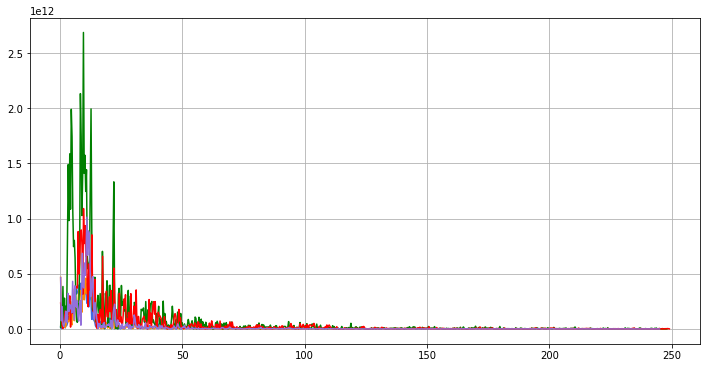

In [29]:
plt.figure(figsize=(12,6))
plt.plot(freq694_1[1:len(C_694_a1)//2],C_694_a1[1:len(C_694_a1)//2], color='royalblue')
plt.plot(freq694_2[1:len(C_694_a2)//2],C_694_a2[1:len(C_694_a2)//2], color='darkorange')
plt.plot(freq694_3[1:len(C_694_a3)//2],C_694_a3[1:len(C_694_a3)//2], color='green')
plt.plot(freq694_4[1:len(C_694_a3)//2],C_694_a4[1:len(C_694_a3)//2], color='red')
plt.plot(freq694_5[1:len(C_694_a3)//2],C_694_a5[1:len(C_694_a3)//2], color='mediumpurple')

#plt.xlim(0,300)

plt.grid()

In [30]:
indices694_a1 = C_694_a1 > 0.24*10**12
indices694_a2 = C_694_a2 > 0.24*10**12
indices694_a3 = C_694_a3 > 0.24*10**12
indices694_a4 = C_694_a4 > 0.24*10**12
indices694_a5 = C_694_a5 > 0.24*10**12

C_694_a1clean = C_694_a1 * indices694_a1
C_694_a2clean = C_694_a2 * indices694_a2
C_694_a3clean = C_694_a3 * indices694_a3
C_694_a4clean = C_694_a4 * indices694_a4
C_694_a5clean = C_694_a5 * indices694_a5

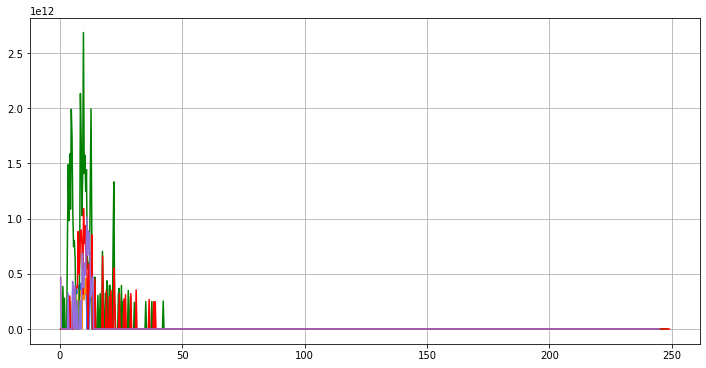

In [31]:
plt.figure(figsize=(12,6))
plt.plot(freq694_1[1:len(C_694_a1clean)//2],C_694_a1clean[1:len(C_694_a1clean)//2], color='royalblue')
plt.plot(freq694_2[1:len(C_694_a2clean)//2],C_694_a2clean[1:len(C_694_a2clean)//2], color='darkorange')
plt.plot(freq694_3[1:len(C_694_a3clean)//2],C_694_a3clean[1:len(C_694_a3clean)//2], color='green')
plt.plot(freq694_4[1:len(C_694_a4clean)//2],C_694_a4clean[1:len(C_694_a4clean)//2], color='red')
plt.plot(freq694_5[1:len(C_694_a5clean)//2],C_694_a5clean[1:len(C_694_a5clean)//2], color='mediumpurple')

#plt.xlim(0,300)

plt.grid()

### 820

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARI

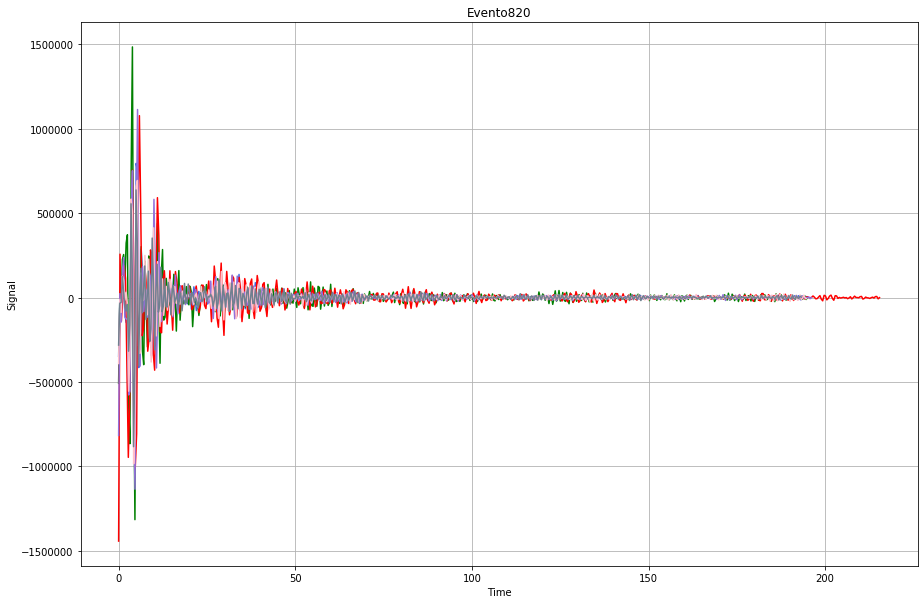

In [32]:
plt.figure(figsize=(15,10))

plt.plot(freq820_1[:len(evento820_a1_xr.index)//2], evento820_a1_xr_FFT[:len(evento820_a1_xr.index)//2], color='royalblue', label='R9')
plt.plot(freq820_3[:len(evento820_a3_xr.index)//2], evento820_a3_xr_FFT[:len(evento820_a3_xr.index)//2], color='green', label='R9')
plt.plot(freq820_4[:len(evento820_a4_xr.index)//2], evento820_a4_xr_FFT[:len(evento820_a4_xr.index)//2], color='red', label='R9')
plt.plot(freq820_5[:len(evento820_a5_xr.index)//2], evento820_a5_xr_FFT[:len(evento820_a5_xr.index)//2], color='mediumpurple', label='R9')
plt.plot(freq820_7[:len(evento820_a7_xr.index)//2], evento820_a7_xr_FFT[:len(evento820_a7_xr.index)//2], color='pink', label='R9')
plt.plot(freq820_8[:len(evento820_a8_xr.index)//2], evento820_a8_xr_FFT[:len(evento820_a8_xr.index)//2], color='slategray', label='R9')

plt.title("Evento820")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.grid()
#plt.xlim(216.007405,218.152862)
#plt.xlim(216.007405,217.791571)


In [33]:
C_820_a1 = np.sqrt(2*np.pi)*np.conjugate(evento820_a1_xr_FFT)*evento820_a1_xr_FFT
C_820_a1 = C_820_a1/np.sqrt(2*np.pi)
C_820_a1 = np.abs(C_820_a1)

C_820_a3 = np.sqrt(2*np.pi)*np.conjugate(evento820_a3_xr_FFT)*evento820_a3_xr_FFT
C_820_a3 = C_820_a3/np.sqrt(2*np.pi)
C_820_a3 = np.abs(C_820_a3)

C_820_a4 = np.sqrt(2*np.pi)*np.conjugate(evento820_a4_xr_FFT)*evento820_a4_xr_FFT
C_820_a4 = C_820_a4/np.sqrt(2*np.pi)
C_820_a4 = np.abs(C_820_a4)

C_820_a5 = np.sqrt(2*np.pi)*np.conjugate(evento820_a5_xr_FFT)*evento820_a5_xr_FFT
C_820_a5 = C_820_a5/np.sqrt(2*np.pi)
C_820_a5 = np.abs(C_820_a5)

C_820_a7 = np.sqrt(2*np.pi)*np.conjugate(evento820_a7_xr_FFT)*evento820_a7_xr_FFT
C_820_a7 = C_820_a7/np.sqrt(2*np.pi)
C_820_a7 = np.abs(C_820_a7)

C_820_a8 = np.sqrt(2*np.pi)*np.conjugate(evento820_a8_xr_FFT)*evento820_a8_xr_FFT
C_820_a8 = C_820_a8/np.sqrt(2*np.pi)
C_820_a8 = np.abs(C_820_a8)

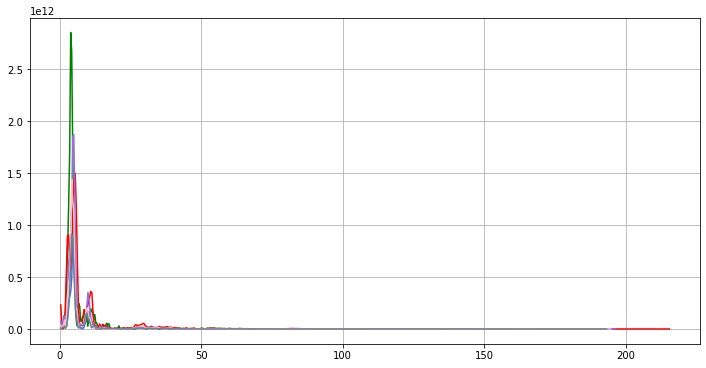

In [34]:
plt.figure(figsize=(12,6))
plt.plot(freq820_1[1:len(C_820_a1)//2],C_820_a1[1:len(C_820_a1)//2], color='royalblue')
plt.plot(freq820_3[1:len(C_820_a3)//2],C_820_a3[1:len(C_820_a3)//2], color='green')
plt.plot(freq820_4[1:len(C_820_a4)//2],C_820_a4[1:len(C_820_a4)//2], color='red')
plt.plot(freq820_5[1:len(C_820_a5)//2],C_820_a5[1:len(C_820_a5)//2], color='mediumpurple')
plt.plot(freq820_7[1:len(C_820_a7)//2],C_820_a7[1:len(C_820_a7)//2], color='pink')
plt.plot(freq820_8[1:len(C_820_a8)//2],C_820_a8[1:len(C_820_a8)//2], color='slategray')


#plt.xlim(0,300)

plt.grid()

In [35]:
indices820_a1 = C_820_a1 > 0.1*10**12
indices820_a3 = C_820_a3 > 0.1*10**12
indices820_a4 = C_820_a4 > 0.1*10**12
indices820_a5 = C_820_a5 > 0.1*10**12
indices820_a7 = C_820_a7 > 0.1*10**12
indices820_a8 = C_820_a8 > 0.1*10**12

C_820_a1clean = C_820_a1 * indices820_a1
C_820_a3clean = C_820_a3 * indices820_a3
C_820_a4clean = C_820_a4 * indices820_a4
C_820_a5clean = C_820_a5 * indices820_a5
C_820_a7clean = C_820_a7 * indices820_a7
C_820_a8clean = C_820_a8 * indices820_a8

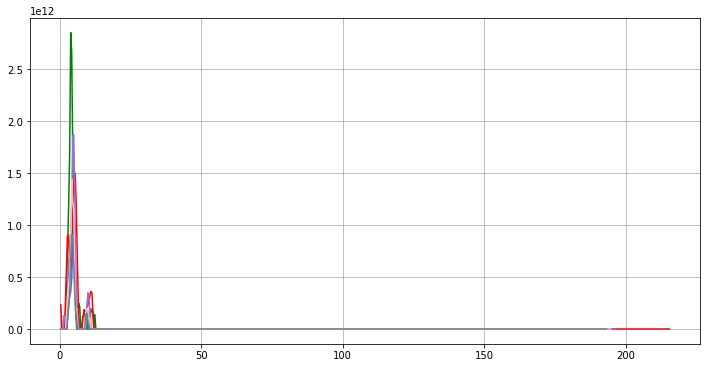

In [36]:
plt.figure(figsize=(12,6))
plt.plot(freq820_1[1:len(C_820_a1clean)//2],C_820_a1clean[1:len(C_820_a1clean)//2], color='royalblue')
plt.plot(freq820_3[1:len(C_820_a3clean)//2],C_820_a3clean[1:len(C_820_a3clean)//2], color='green')
plt.plot(freq820_4[1:len(C_820_a4clean)//2],C_820_a4clean[1:len(C_820_a4clean)//2], color='red')
plt.plot(freq820_5[1:len(C_820_a5clean)//2],C_820_a5clean[1:len(C_820_a5clean)//2], color='mediumpurple')
plt.plot(freq820_7[1:len(C_820_a7clean)//2],C_820_a7clean[1:len(C_820_a7clean)//2], color='pink')
plt.plot(freq820_8[1:len(C_820_a8clean)//2],C_820_a8clean[1:len(C_820_a8clean)//2], color='slategray')


#plt.xlim(0,300)

plt.grid()

### 908

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARI

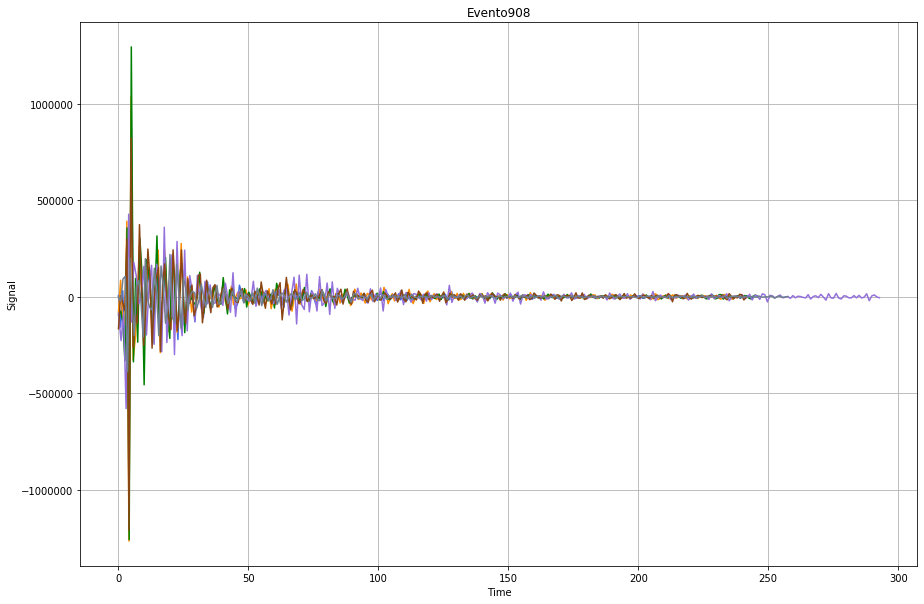

In [37]:
plt.figure(figsize=(15,10))

plt.plot(freq908_1[:len(evento908_a1_xr.index)//2], evento908_a1_xr_FFT[:len(evento908_a1_xr.index)//2], color='royalblue', label='R9')
plt.plot(freq908_2[:len(evento908_a2_xr.index)//2], evento908_a2_xr_FFT[:len(evento908_a2_xr.index)//2], color='darkorange', label='R9')
plt.plot(freq908_3[:len(evento908_a3_xr.index)//2], evento908_a3_xr_FFT[:len(evento908_a3_xr.index)//2], color='green', label='R9')
plt.plot(freq908_5[:len(evento908_a5_xr.index)//2], evento908_a5_xr_FFT[:len(evento908_a5_xr.index)//2], color='mediumpurple', label='R9')
plt.plot(freq908_6[:len(evento908_a6_xr.index)//2], evento908_a6_xr_FFT[:len(evento908_a6_xr.index)//2], color='saddlebrown', label='R9')
plt.plot(freq908_8[:len(evento908_a8_xr.index)//2], evento908_a8_xr_FFT[:len(evento908_a8_xr.index)//2], color='slategray', label='R9')

plt.title("Evento908")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.grid()
#plt.xlim(216.007405,218.152862)
#plt.xlim(216.007405,217.791571)


In [38]:
C_908_a1 = np.sqrt(2*np.pi)*np.conjugate(evento908_a1_xr_FFT)*evento908_a1_xr_FFT
C_908_a1 = C_908_a1/np.sqrt(2*np.pi)
C_908_a1 = np.abs(C_908_a1)

C_908_a2 = np.sqrt(2*np.pi)*np.conjugate(evento908_a2_xr_FFT)*evento908_a2_xr_FFT
C_908_a2 = C_908_a2/np.sqrt(2*np.pi)
C_908_a2 = np.abs(C_908_a2)

C_908_a3 = np.sqrt(2*np.pi)*np.conjugate(evento908_a3_xr_FFT)*evento908_a3_xr_FFT
C_908_a3 = C_908_a3/np.sqrt(2*np.pi)
C_908_a3 = np.abs(C_908_a3)

C_908_a5 = np.sqrt(2*np.pi)*np.conjugate(evento908_a5_xr_FFT)*evento908_a5_xr_FFT
C_908_a5 = C_908_a5/np.sqrt(2*np.pi)
C_908_a5 = np.abs(C_908_a5)

C_908_a6 = np.sqrt(2*np.pi)*np.conjugate(evento908_a6_xr_FFT)*evento908_a6_xr_FFT
C_908_a6 = C_908_a6/np.sqrt(2*np.pi)
C_908_a6 = np.abs(C_908_a6)

C_908_a8 = np.sqrt(2*np.pi)*np.conjugate(evento908_a8_xr_FFT)*evento908_a8_xr_FFT
C_908_a8 = C_908_a8/np.sqrt(2*np.pi)
C_908_a8 = np.abs(C_908_a8)

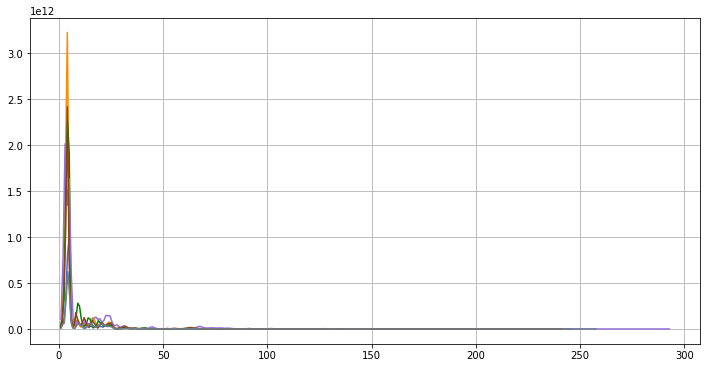

In [39]:
plt.figure(figsize=(12,6))
plt.plot(freq908_1[1:len(C_908_a1)//2],C_908_a1[1:len(C_908_a1)//2], color='royalblue')
plt.plot(freq908_2[1:len(C_908_a2)//2],C_908_a2[1:len(C_908_a2)//2], color='darkorange')
plt.plot(freq908_3[1:len(C_908_a3)//2],C_908_a3[1:len(C_908_a3)//2], color='green')
plt.plot(freq908_5[1:len(C_908_a5)//2],C_908_a5[1:len(C_908_a5)//2], color='mediumpurple')
plt.plot(freq908_6[1:len(C_908_a6)//2],C_908_a6[1:len(C_908_a6)//2], color='saddlebrown')
plt.plot(freq908_8[1:len(C_908_a8)//2],C_908_a8[1:len(C_908_a8)//2], color='slategray')


#plt.xlim(0,300)

plt.grid()

In [40]:
indices908_a1 = C_908_a1 > 0.06*10**12
indices908_a2 = C_908_a2 > 0.06*10**12
indices908_a3 = C_908_a3 > 0.06*10**12
indices908_a5 = C_908_a5 > 0.06*10**12
indices908_a6 = C_908_a6 > 0.06*10**12
indices908_a8 = C_908_a8 > 0.06*10**12

C_908_a1clean = C_908_a1 * indices908_a1
C_908_a2clean = C_908_a2 * indices908_a2
C_908_a3clean = C_908_a3 * indices908_a3
C_908_a5clean = C_908_a5 * indices908_a5
C_908_a6clean = C_908_a6 * indices908_a6
C_908_a8clean = C_908_a8 * indices908_a8

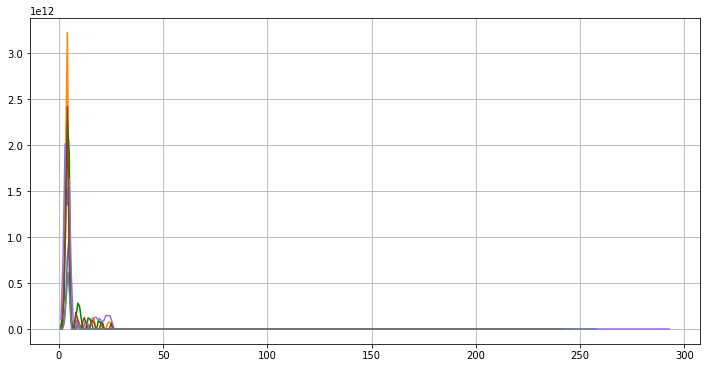

In [41]:
plt.figure(figsize=(12,6))
plt.plot(freq908_1[1:len(C_908_a1clean)//2],C_908_a1clean[1:len(C_908_a1clean)//2], color='royalblue')
plt.plot(freq908_2[1:len(C_908_a2clean)//2],C_908_a2clean[1:len(C_908_a2clean)//2], color='darkorange')
plt.plot(freq908_3[1:len(C_908_a3clean)//2],C_908_a3clean[1:len(C_908_a3clean)//2], color='green')
plt.plot(freq908_5[1:len(C_908_a5clean)//2],C_908_a5clean[1:len(C_908_a5clean)//2], color='mediumpurple')
plt.plot(freq908_6[1:len(C_908_a6clean)//2],C_908_a6clean[1:len(C_908_a6clean)//2], color='saddlebrown')
plt.plot(freq908_8[1:len(C_908_a8clean)//2],C_908_a8clean[1:len(C_908_a8clean)//2], color='slategray')


#plt.xlim(0,300)

plt.grid()

## IFFT - RECUPERACIÓN DE LA SEÑAL CLEAN

In [42]:
reconstruccion318_a1 = indices318_a1*evento318_a1_xr_FFT
reconstruccion318_a1 = ifft(reconstruccion318_a1)
reconstruccion318_a2 = indices318_a2*evento318_a2_xr_FFT
reconstruccion318_a2 = ifft(reconstruccion318_a2)
reconstruccion318_a3 = indices318_a3*evento318_a3_xr_FFT
reconstruccion318_a3 = ifft(reconstruccion318_a3)

reconstruccion480_a1 = indices480_a1*evento480_a1_xr_FFT
reconstruccion480_a1 = ifft(reconstruccion480_a1)
reconstruccion480_a2 = indices480_a2*evento480_a2_xr_FFT
reconstruccion480_a2 = ifft(reconstruccion480_a2)
reconstruccion480_a3 = indices480_a3*evento480_a3_xr_FFT
reconstruccion480_a3 = ifft(reconstruccion480_a3)
reconstruccion480_a4 = indices480_a4*evento480_a4_xr_FFT
reconstruccion480_a4 = ifft(reconstruccion480_a4)
reconstruccion480_a5 = indices480_a5*evento480_a5_xr_FFT
reconstruccion480_a5 = ifft(reconstruccion480_a5)

reconstruccion694_a1 = indices694_a1*evento694_a1_xr_FFT
reconstruccion694_a1 = ifft(reconstruccion694_a1)
reconstruccion694_a2 = indices694_a2*evento694_a2_xr_FFT
reconstruccion694_a2 = ifft(reconstruccion694_a2)
reconstruccion694_a3 = indices694_a3*evento694_a3_xr_FFT
reconstruccion694_a3 = ifft(reconstruccion694_a3)
reconstruccion694_a4 = indices694_a4*evento694_a4_xr_FFT
reconstruccion694_a4 = ifft(reconstruccion694_a4)
reconstruccion694_a5 = indices694_a5*evento694_a5_xr_FFT
reconstruccion694_a5 = ifft(reconstruccion694_a5)

reconstruccion820_a1 = indices820_a1*evento820_a1_xr_FFT
reconstruccion820_a1 = ifft(reconstruccion820_a1)
reconstruccion820_a3 = indices820_a3*evento820_a3_xr_FFT
reconstruccion820_a3 = ifft(reconstruccion820_a3)
reconstruccion820_a4 = indices820_a4*evento820_a4_xr_FFT
reconstruccion820_a4 = ifft(reconstruccion820_a4)
reconstruccion820_a5 = indices820_a5*evento820_a5_xr_FFT
reconstruccion820_a5 = ifft(reconstruccion820_a5)
reconstruccion820_a7 = indices820_a7*evento820_a7_xr_FFT
reconstruccion820_a7 = ifft(reconstruccion820_a7)
reconstruccion820_a8 = indices820_a8*evento820_a8_xr_FFT
reconstruccion820_a8 = ifft(reconstruccion820_a8)

reconstruccion908_a1 = indices908_a1*evento908_a1_xr_FFT
reconstruccion908_a1 = ifft(reconstruccion908_a1)
reconstruccion908_a2 = indices908_a2*evento908_a2_xr_FFT
reconstruccion908_a2 = ifft(reconstruccion908_a2)
reconstruccion908_a3 = indices908_a3*evento908_a3_xr_FFT
reconstruccion908_a3 = ifft(reconstruccion908_a3)
reconstruccion908_a5 = indices908_a5*evento908_a5_xr_FFT
reconstruccion908_a5 = ifft(reconstruccion908_a5)
reconstruccion908_a6 = indices908_a6*evento908_a6_xr_FFT
reconstruccion908_a6 = ifft(reconstruccion908_a6)
reconstruccion908_a8 = indices908_a8*evento908_a8_xr_FFT
reconstruccion908_a8 = ifft(reconstruccion908_a8)

## 318

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


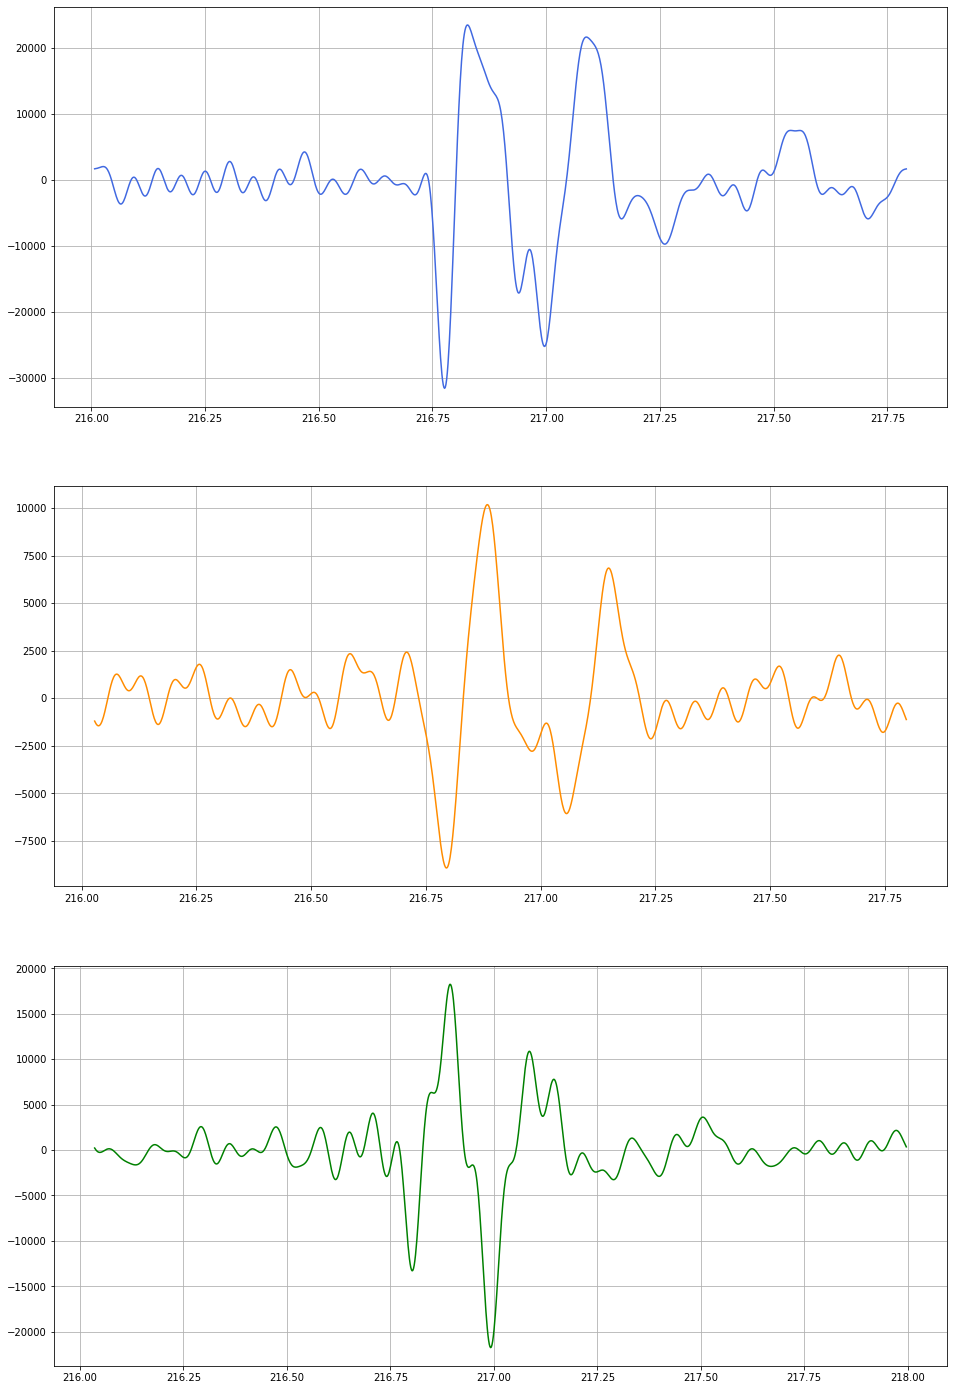

In [43]:
fig, (bx1, bx2, bx3) = plt.subplots(3, figsize=(16,25))
bx1.plot(evento318_a1_xr.index, reconstruccion318_a1, color='royalblue')
bx1.grid()

bx2.plot(evento318_a2_xr.index, reconstruccion318_a2, color='darkorange')
bx2.grid()

bx3.plot(evento318_a3_xr.index, reconstruccion318_a3, color='green')
bx3.grid()

## 480

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


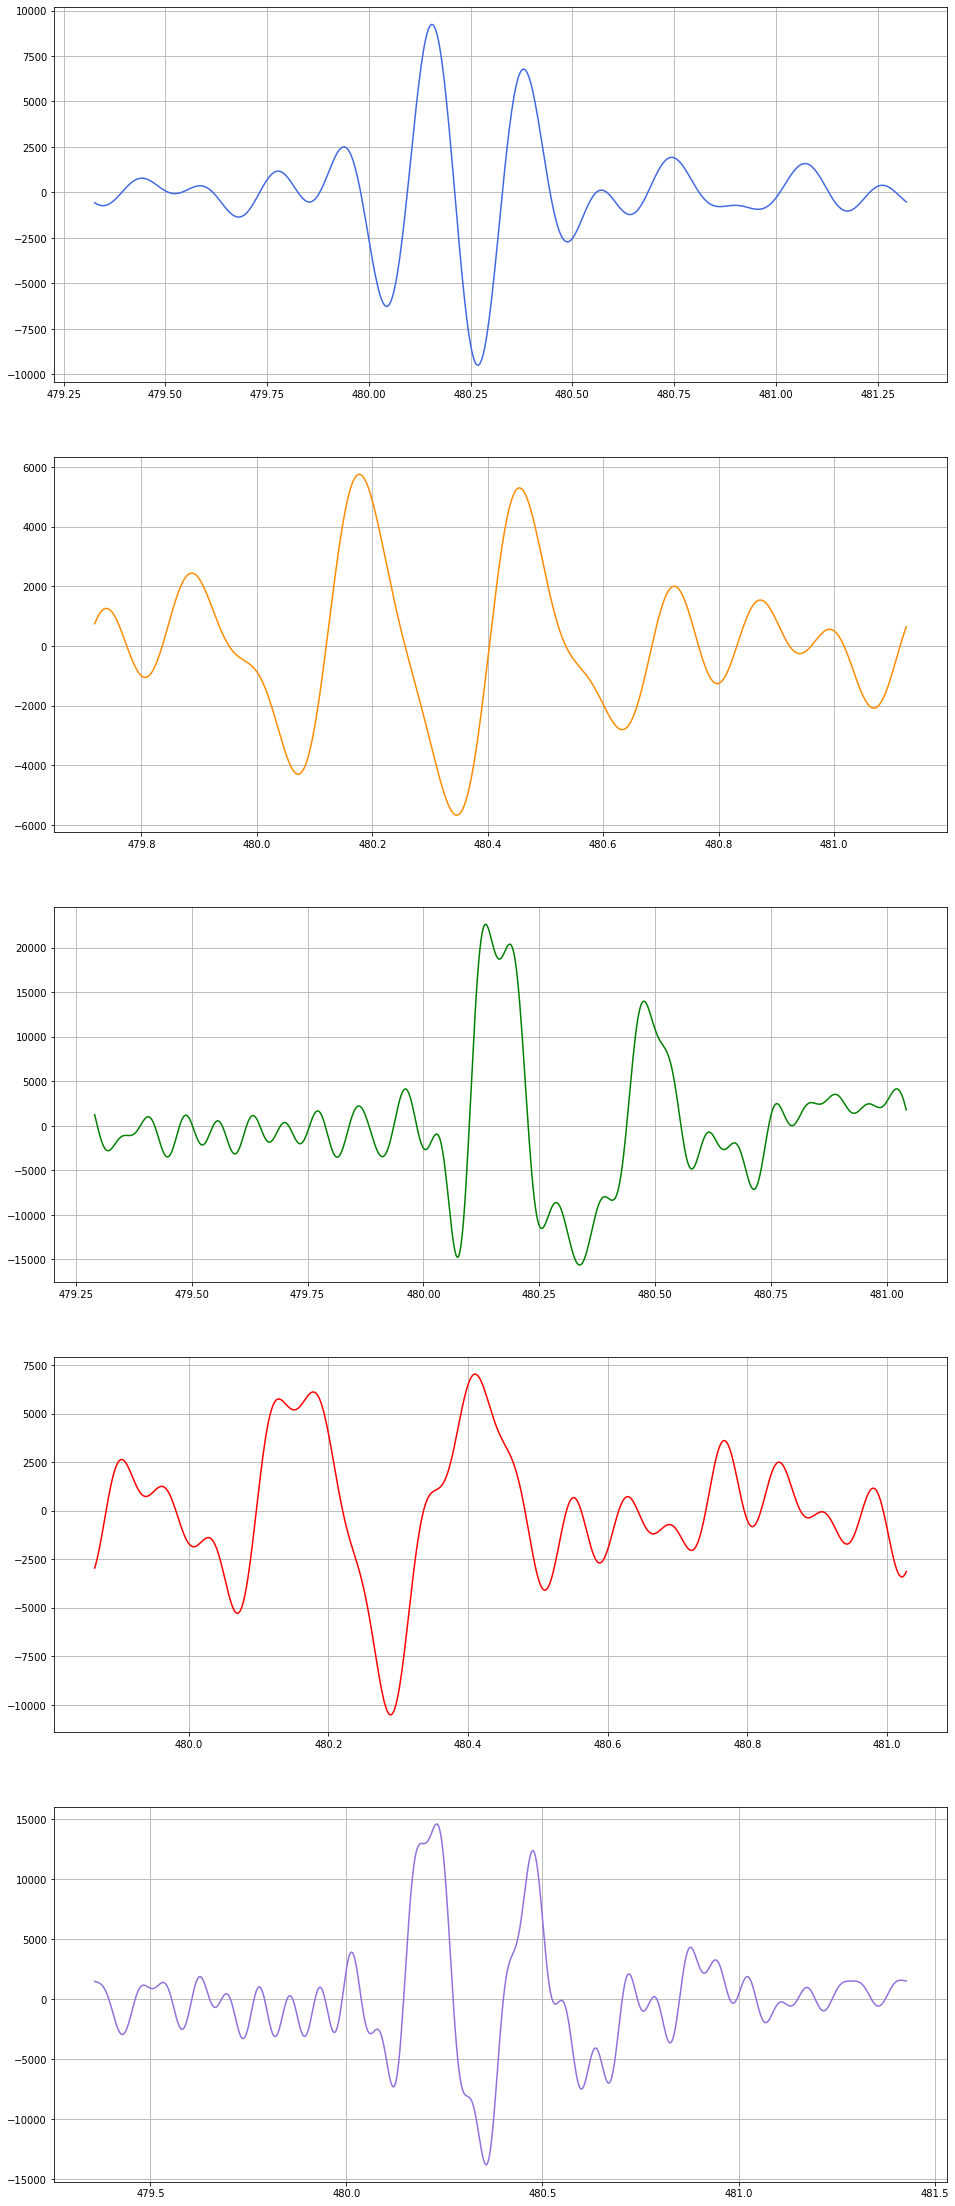

In [44]:
fig, (cx1, cx2, cx3, cx4, cx5) = plt.subplots(5, figsize=(16,40))
cx1.plot(evento480_a1_xr.index, reconstruccion480_a1, color='royalblue')
cx1.grid()

cx2.plot(evento480_a2_xr.index, reconstruccion480_a2, color='darkorange')
cx2.grid()

cx3.plot(evento480_a3_xr.index, reconstruccion480_a3, color='green')
cx3.grid()

cx4.plot(evento480_a4_xr.index, reconstruccion480_a4, color='red')
cx4.grid()

cx5.plot(evento480_a5_xr.index, reconstruccion480_a5, color='mediumpurple')
cx5.grid()

## 694

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


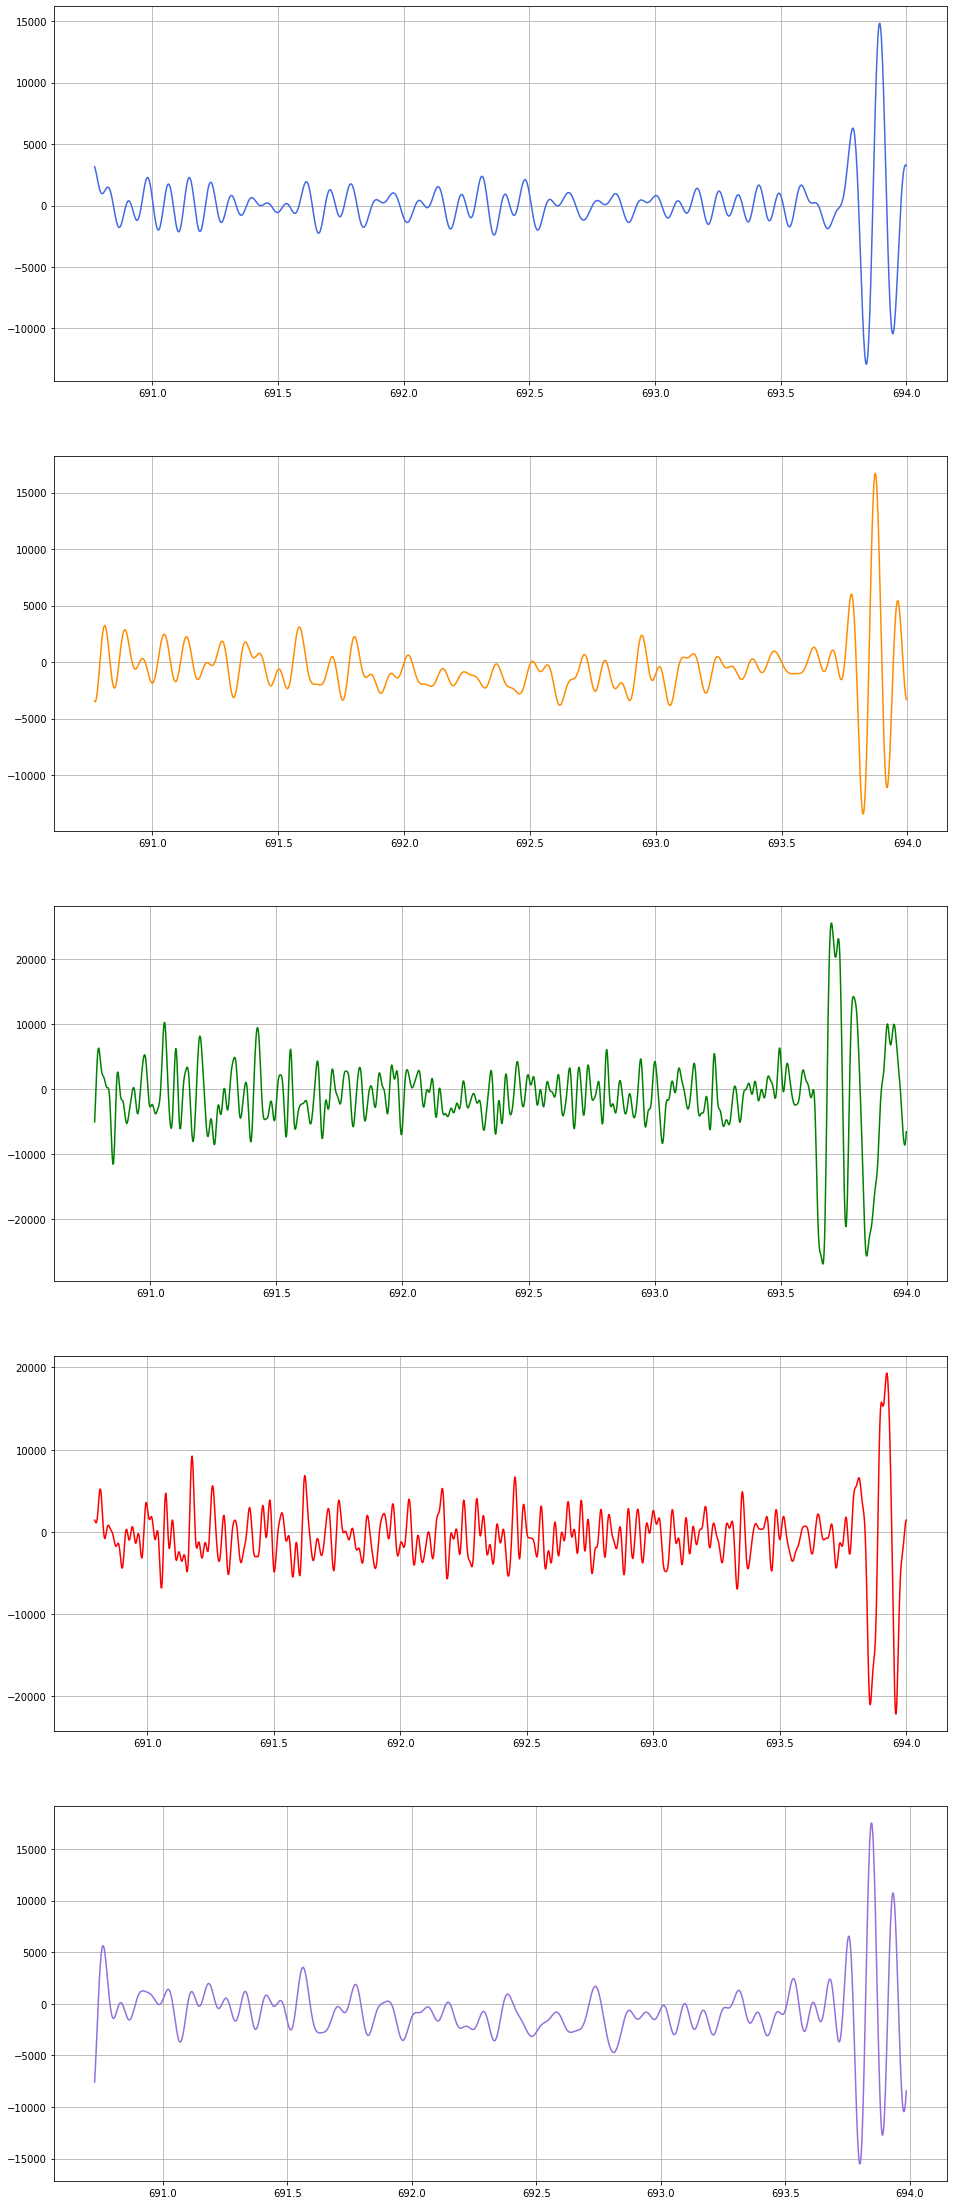

In [45]:
fig, (dx1, dx2, dx3, dx4, dx5) = plt.subplots(5, figsize=(16,40))
dx1.plot(evento694_a1_xr.index, reconstruccion694_a1, color='royalblue')
dx1.grid()

dx2.plot(evento694_a2_xr.index, reconstruccion694_a2, color='darkorange')
dx2.grid()

dx3.plot(evento694_a3_xr.index, reconstruccion694_a3, color='green')
dx3.grid()

dx4.plot(evento694_a4_xr.index, reconstruccion694_a4, color='red')
dx4.grid()

dx5.plot(evento694_a5_xr.index, reconstruccion694_a5, color='mediumpurple')
dx5.grid()

## 820

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARI

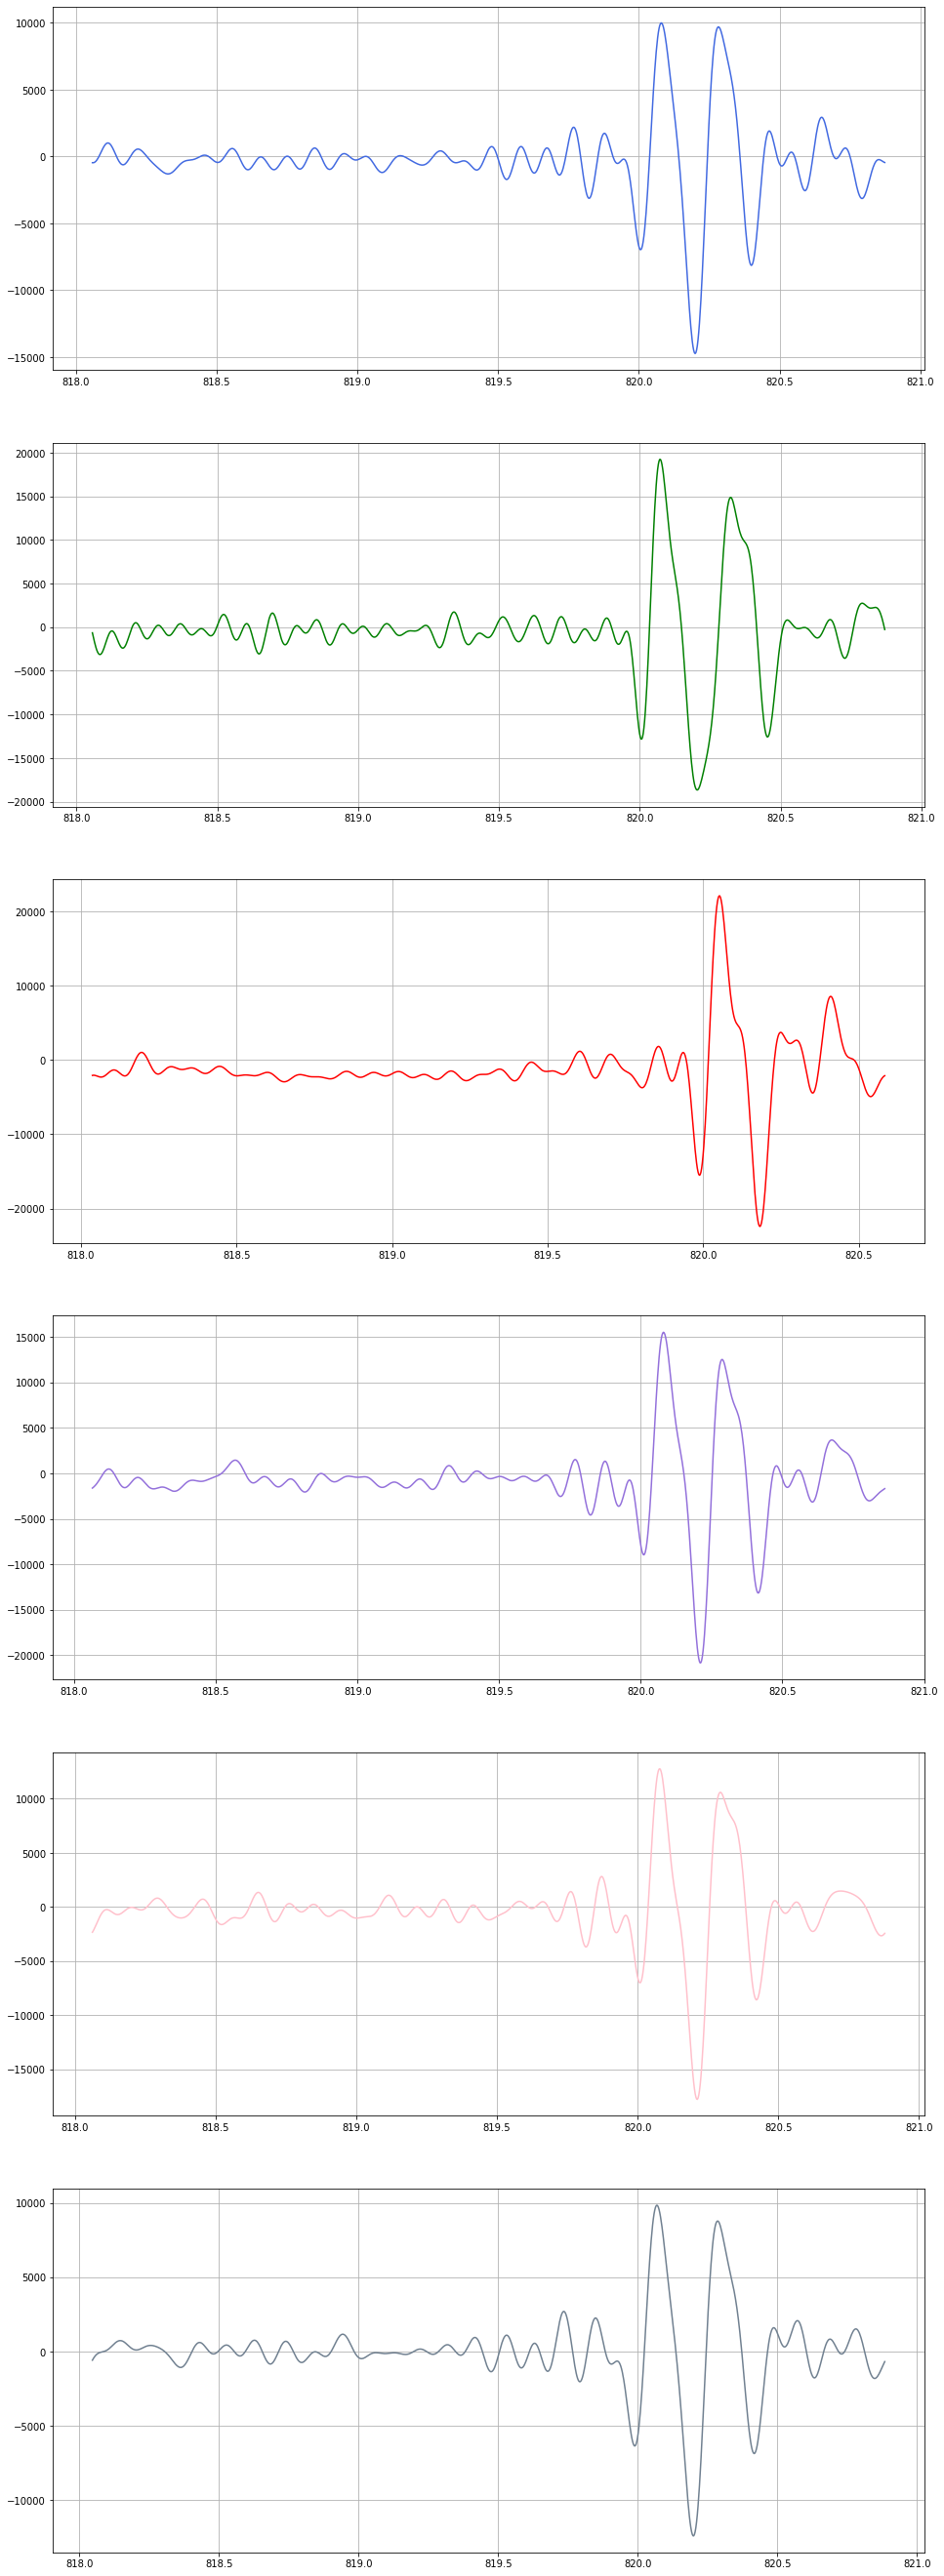

In [46]:
fig, (ex1, ex2, ex3, ex4, ex5, ex6) = plt.subplots(6, figsize=(16,48))
ex1.plot(evento820_a1_xr.index, reconstruccion820_a1, color='royalblue')
ex1.grid()

ex2.plot(evento820_a3_xr.index, reconstruccion820_a3, color='green')
ex2.grid()

ex3.plot(evento820_a4_xr.index, reconstruccion820_a4, color='red')
ex3.grid()

ex4.plot(evento820_a5_xr.index, reconstruccion820_a5, color='mediumpurple')
ex4.grid()

ex5.plot(evento820_a7_xr.index, reconstruccion820_a7, color='pink')
ex5.grid()

ex6.plot(evento820_a8_xr.index, reconstruccion820_a8, color='slategray')
ex6.grid()

## 908

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARI

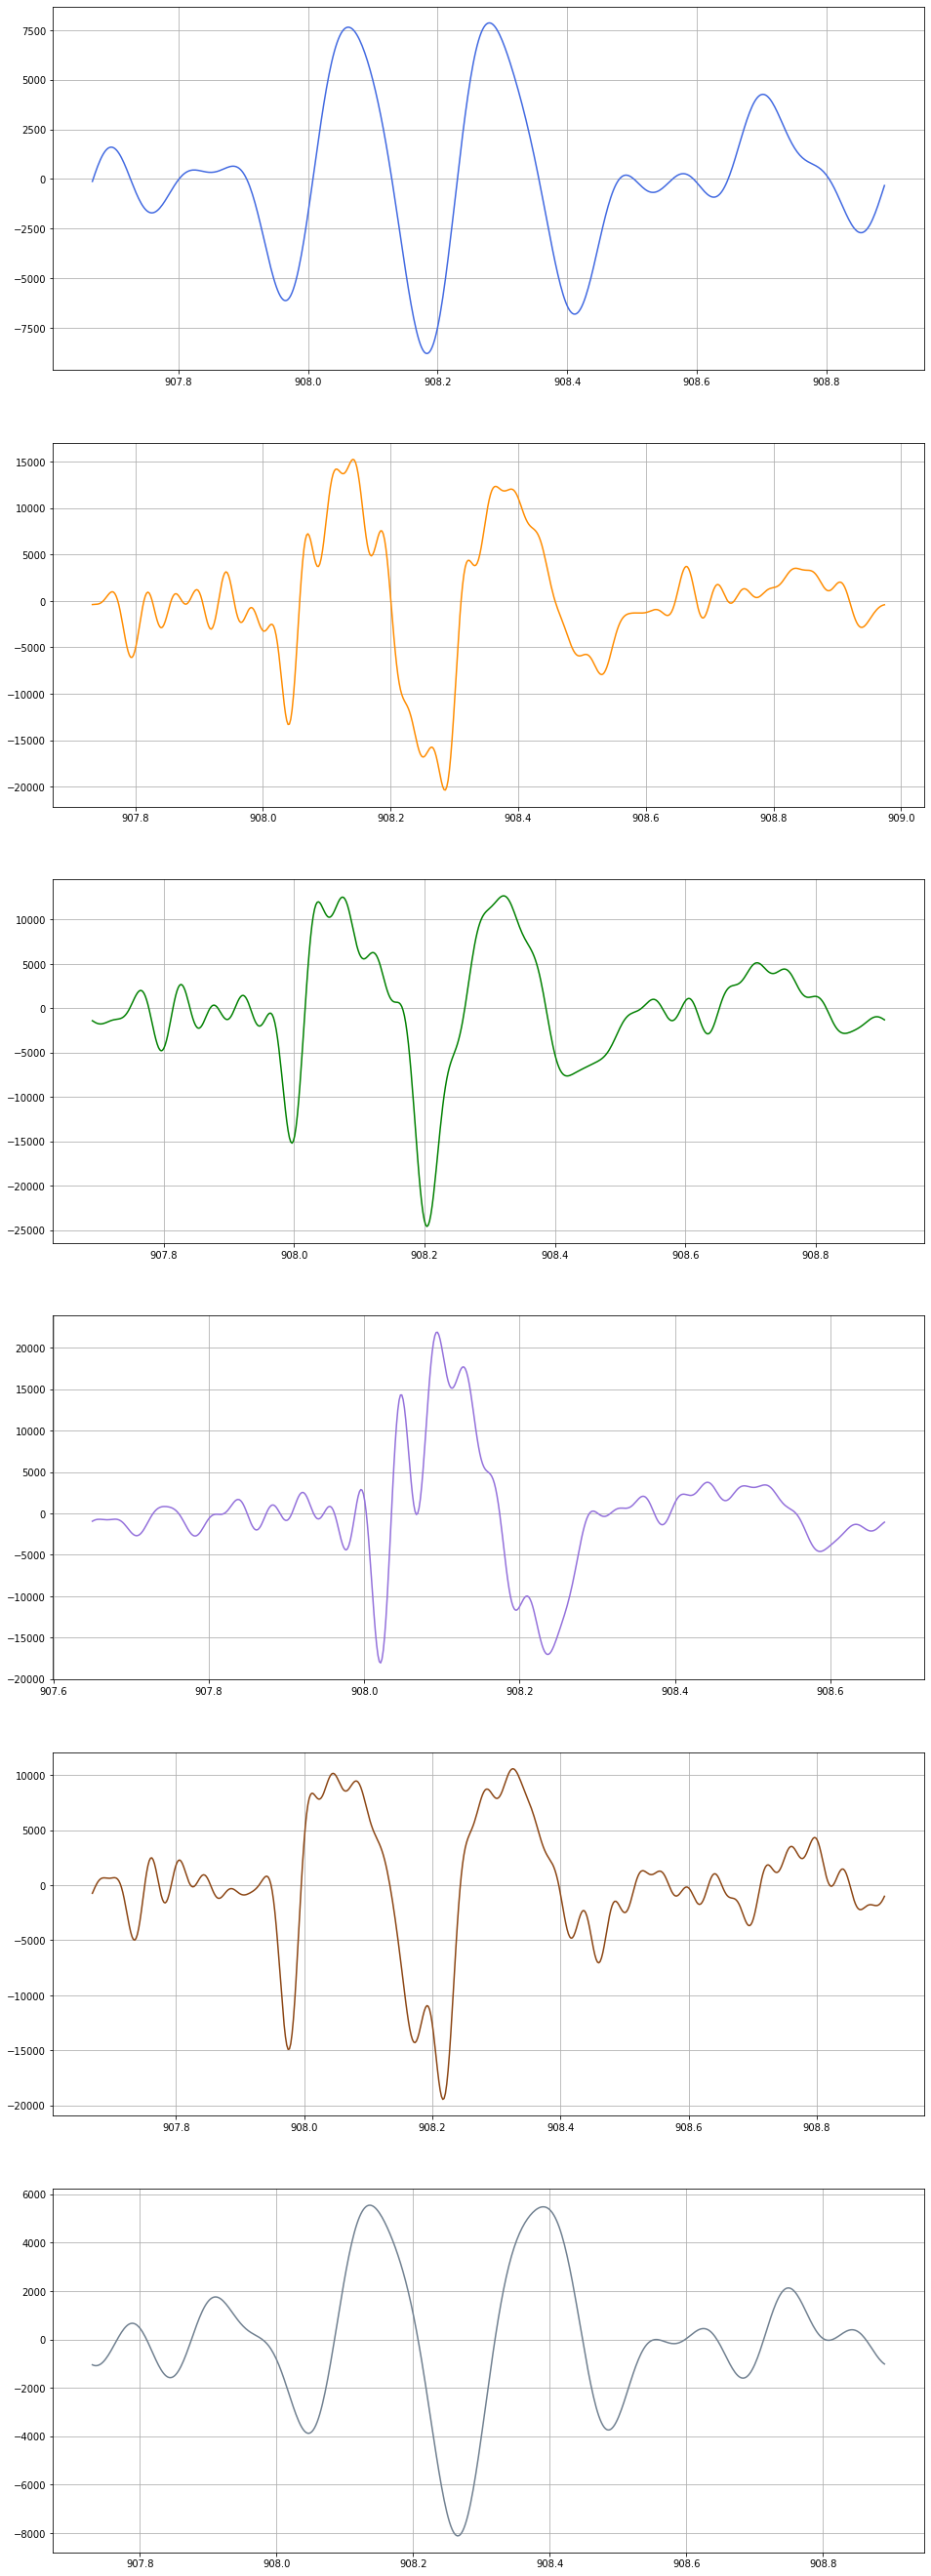

In [47]:
fig, (ex1, ex2, ex3, ex4, ex5, ex6) = plt.subplots(6, figsize=(16,48))
ex1.plot(evento908_a1_xr.index, reconstruccion908_a1, color='royalblue')
ex1.grid()

ex2.plot(evento908_a2_xr.index, reconstruccion908_a2, color='darkorange')
ex2.grid()

ex3.plot(evento908_a3_xr.index, reconstruccion908_a3, color='green')
ex3.grid()

ex4.plot(evento908_a5_xr.index, reconstruccion908_a5, color='mediumpurple')
ex4.grid()

ex5.plot(evento908_a6_xr.index, reconstruccion908_a6, color='saddlebrown')
ex5.grid()

ex6.plot(evento908_a8_xr.index, reconstruccion908_a8, color='slategray')
ex6.grid()